<a href="https://www.kaggle.com/code/vicmangiltafolla/simple-eda-feature-engineering-techniques?scriptVersionId=154880288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [1]:
import pandas as pd #Data processing
import numpy as np #Linear Algebra
#Graphs ans plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # Impute NaN values
import re #Regular expressions
from sklearn.model_selection import train_test_split #Split data set into training and validation subsets
from sklearn.preprocessing import OneHotEncoder #Encoder for data
from sklearn.svm import SVC #Model for predictions
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix #Model evaluation

# Reading and general info

In [2]:
#read csv's
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Display columns data type and non null rows
df_train.info()
print()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count 

In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


As we can see, most of the columns have some null values that we need to take care of. 

Also, it seems that the luxury related columns have a highly lefted distribution so that most of the values are 0.

# Visualization

## Histograms

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

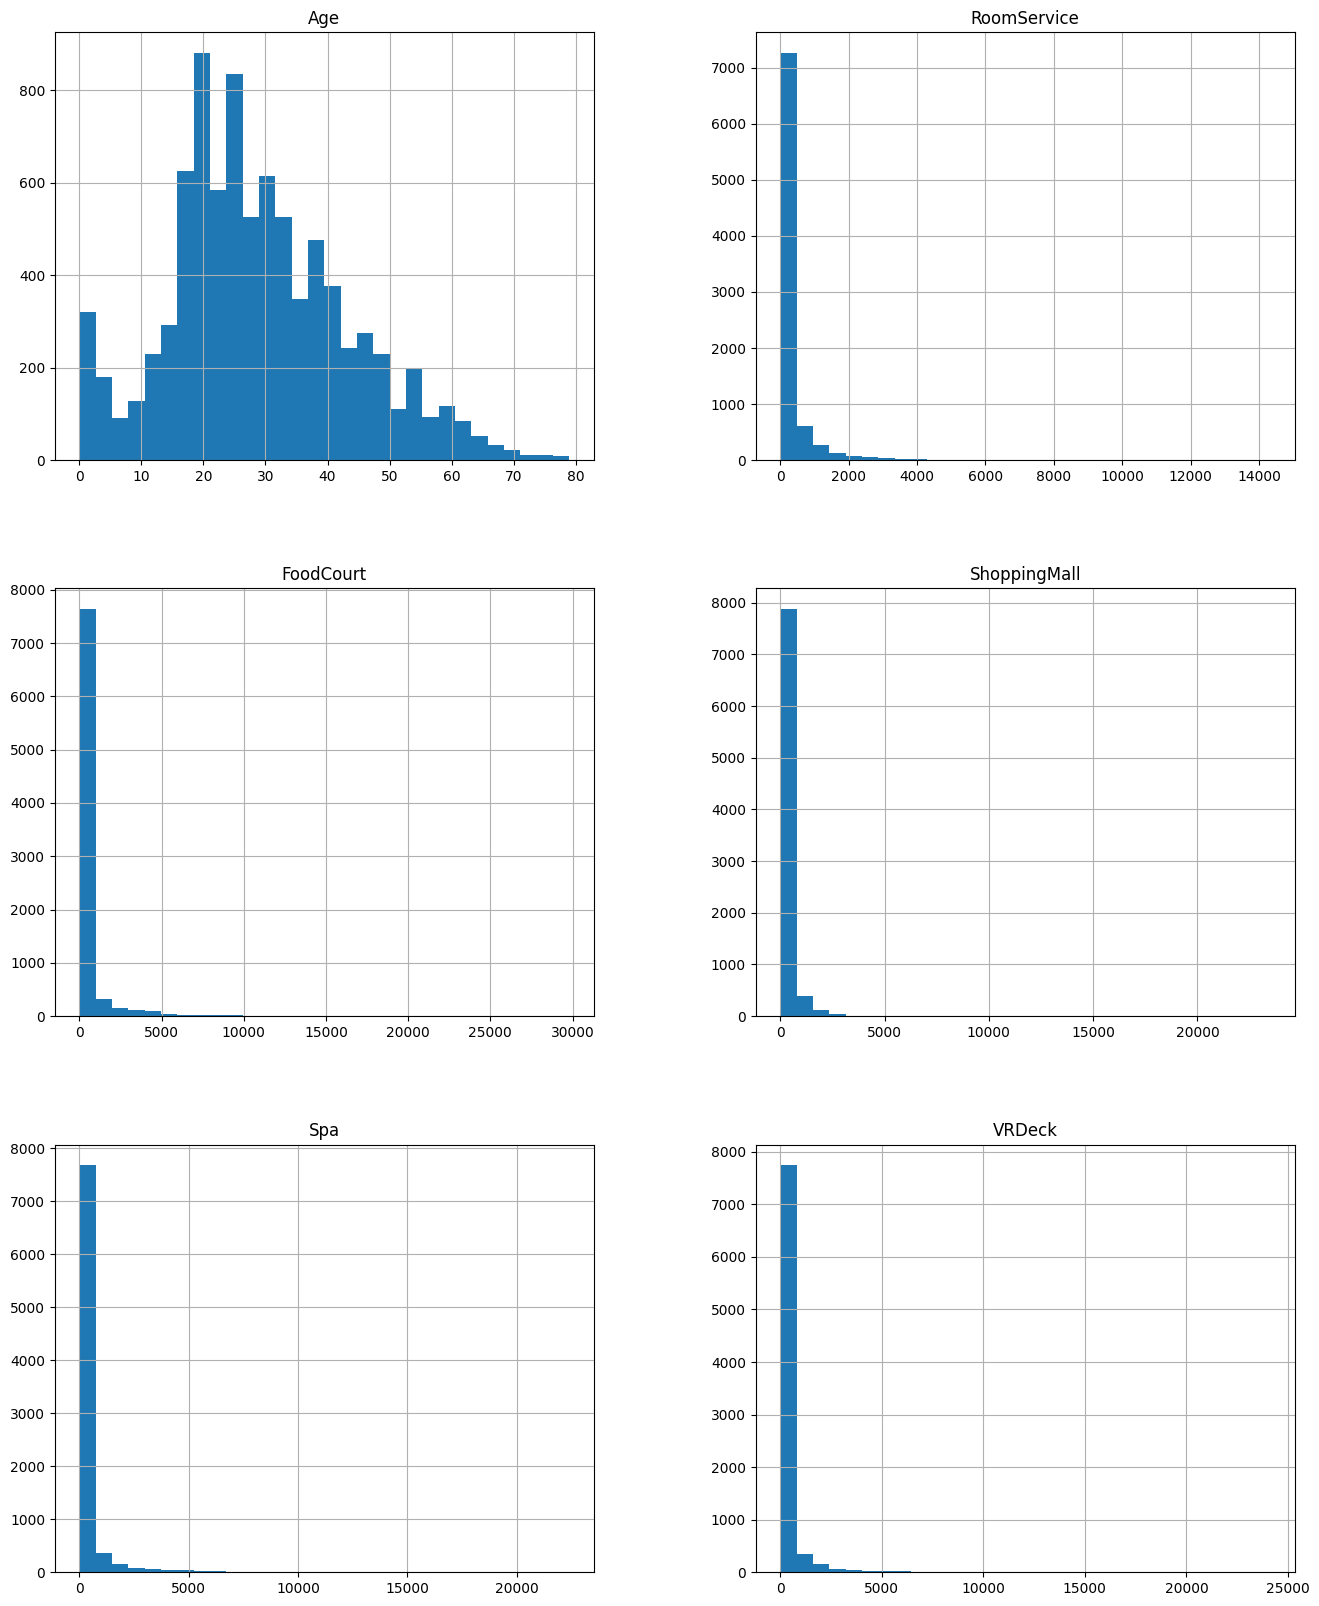

In [5]:
df_train.hist(figsize=(16,20), bins=30)

As suspected, the vast mayority of samples are 0 in the RoomService, FoodCourt, ShooppingMall, Spa and VRDeck columns with some extreme outliers in each one. 

## Count plots

Now, let's plot the distribution in the categorical columns

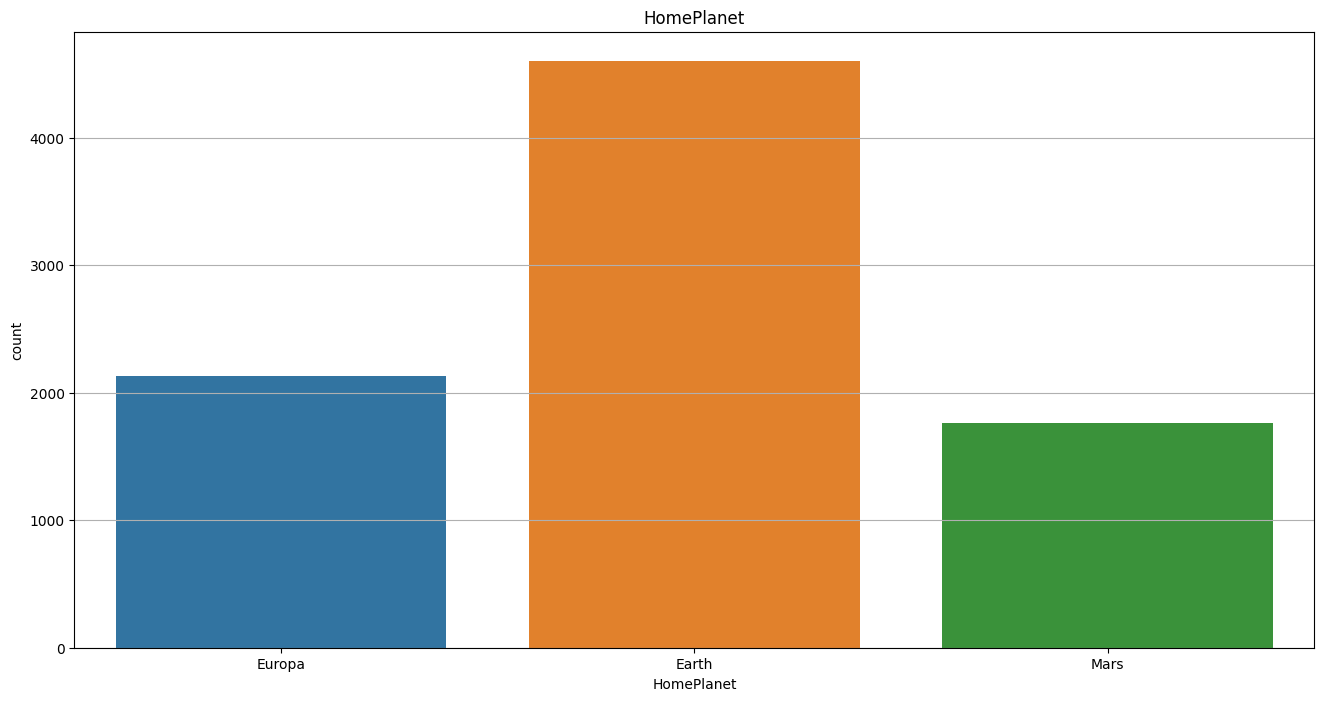

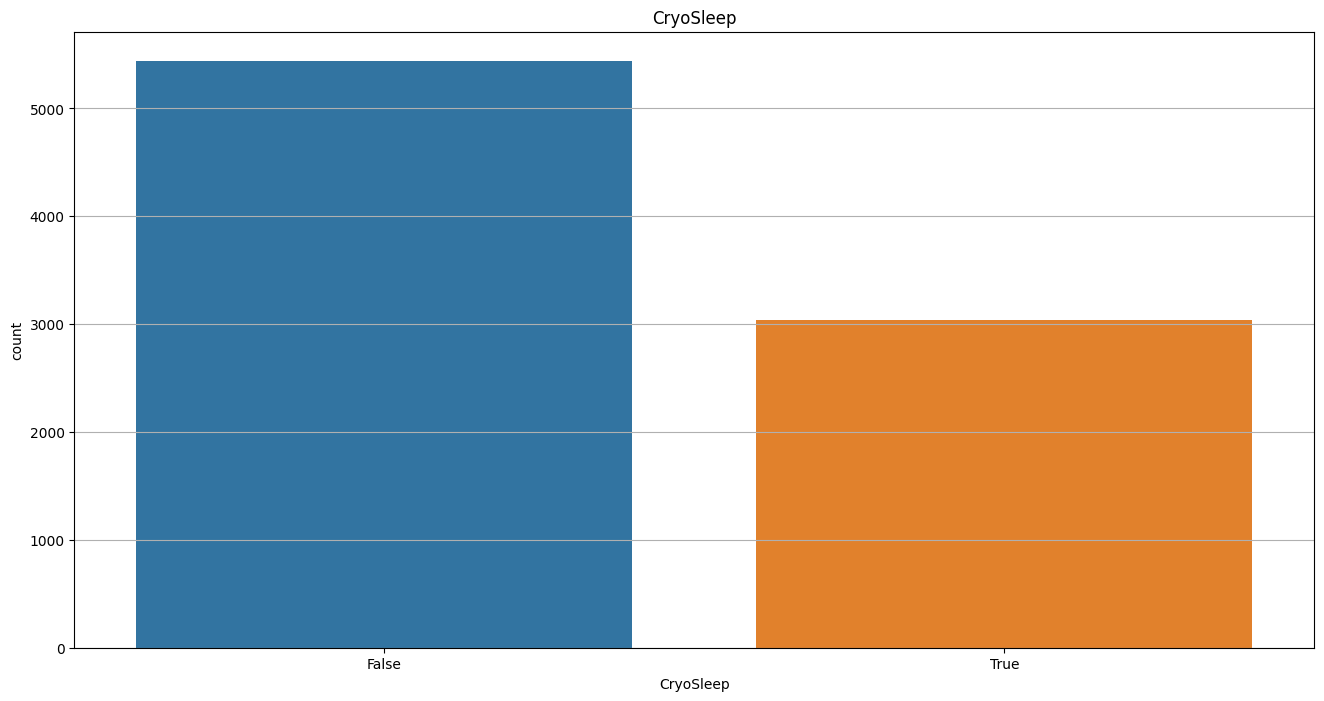

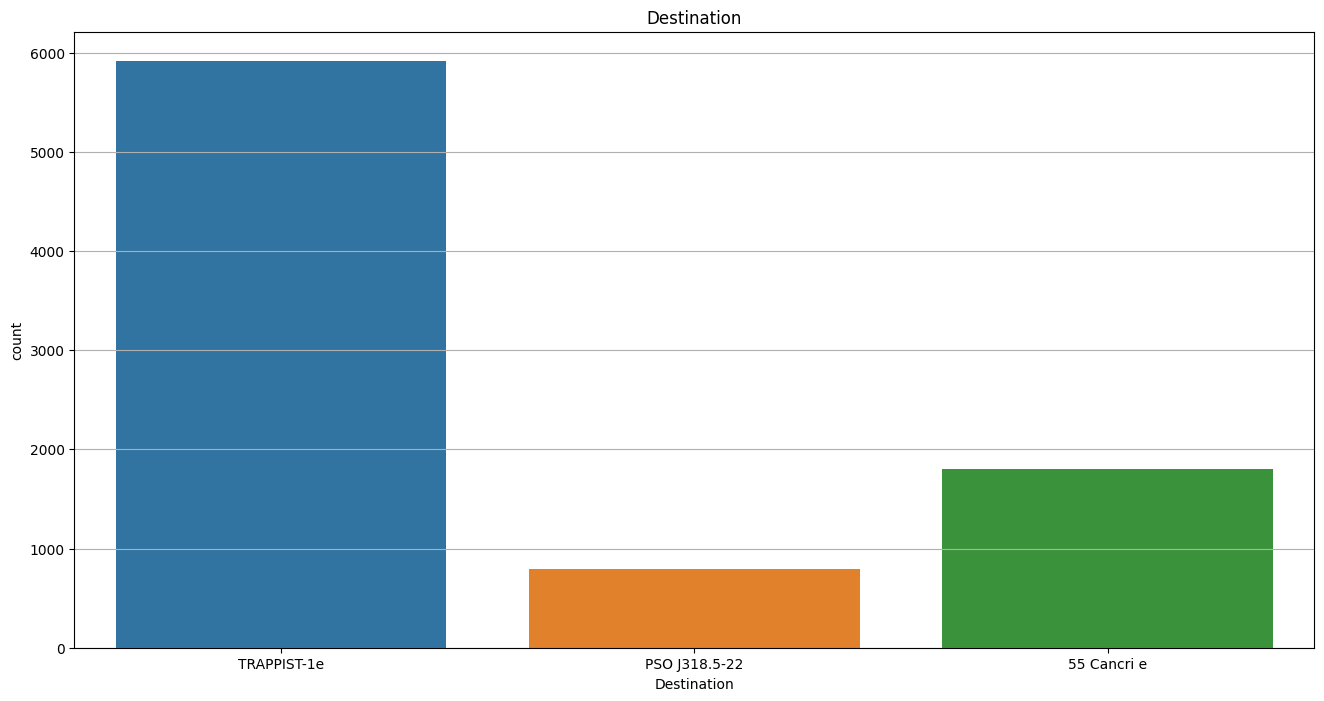

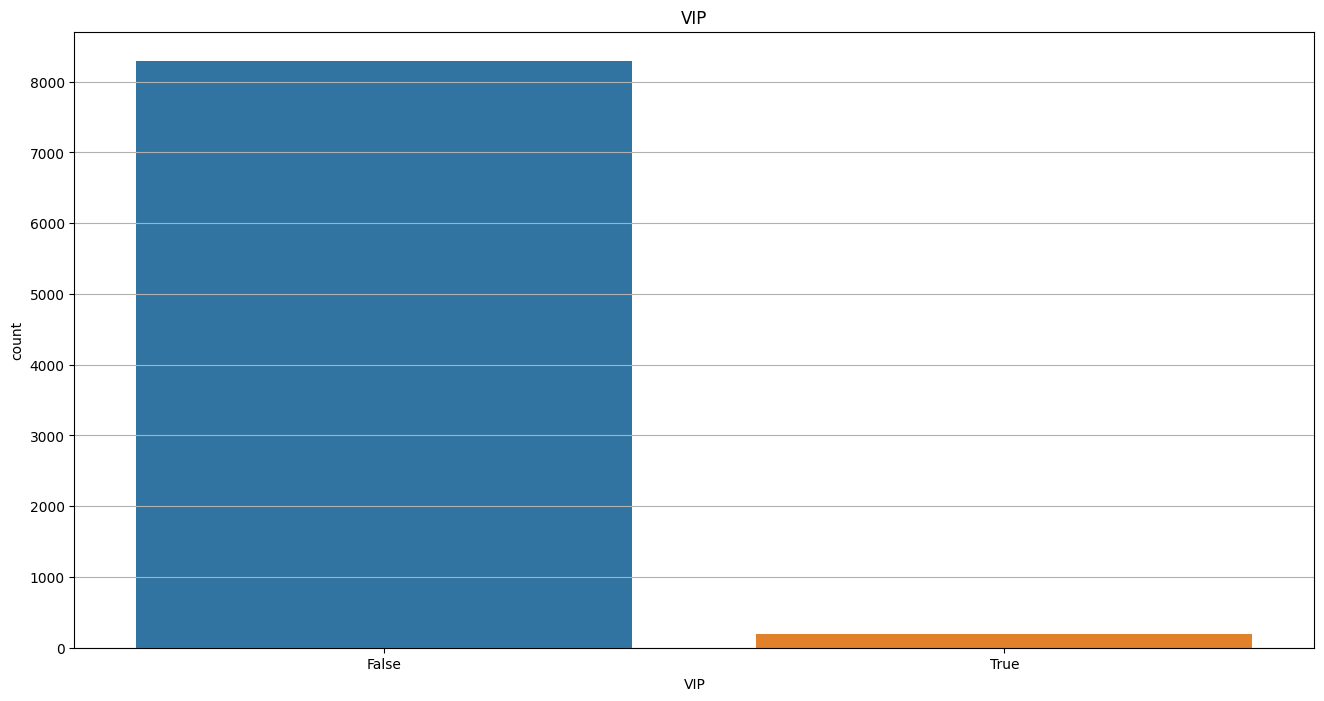

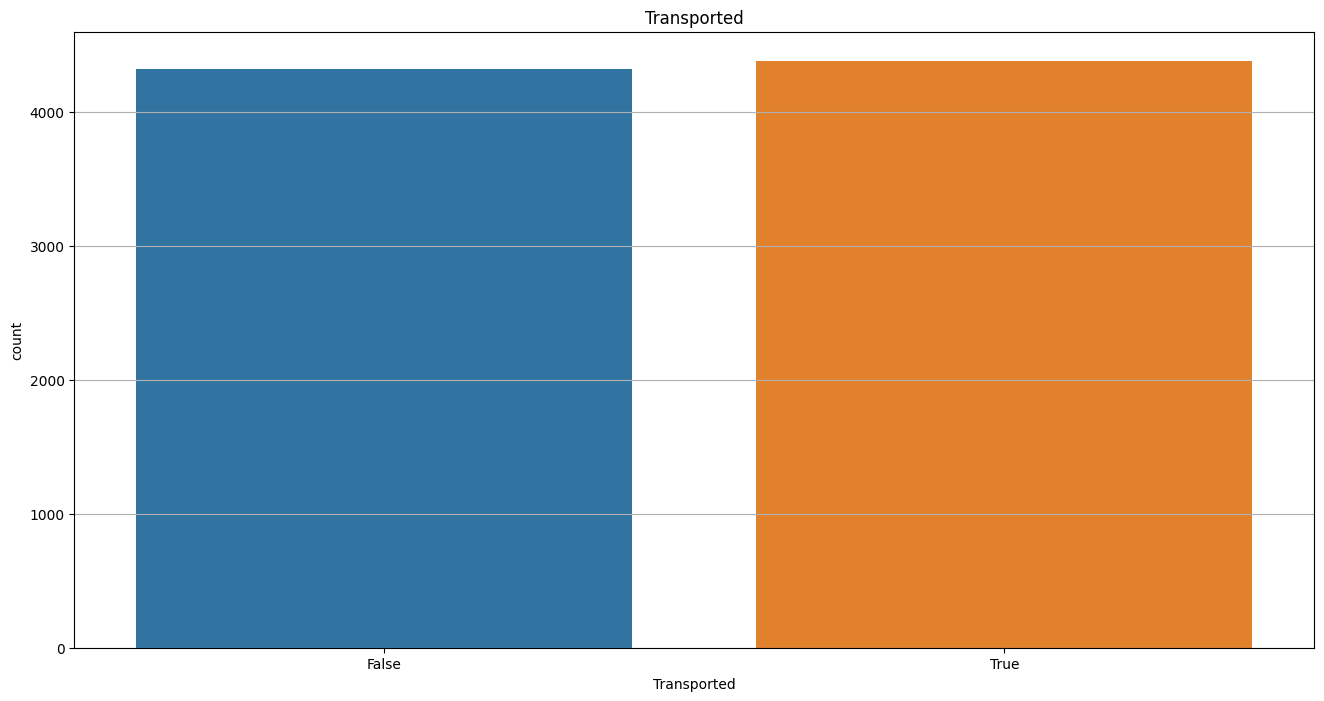

In [6]:
for column in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']:
    plt.figure(figsize=(16,8))
    plt.grid()
    sns.countplot(x=df_train[column])
    plt.title(column)

## Variables correlation

In order to gain more insights about the data, plot the number of observation in some column and group it with other column

### HomePlanet

#### CryoSleep

<Axes: xlabel='CryoSleep', ylabel='count'>

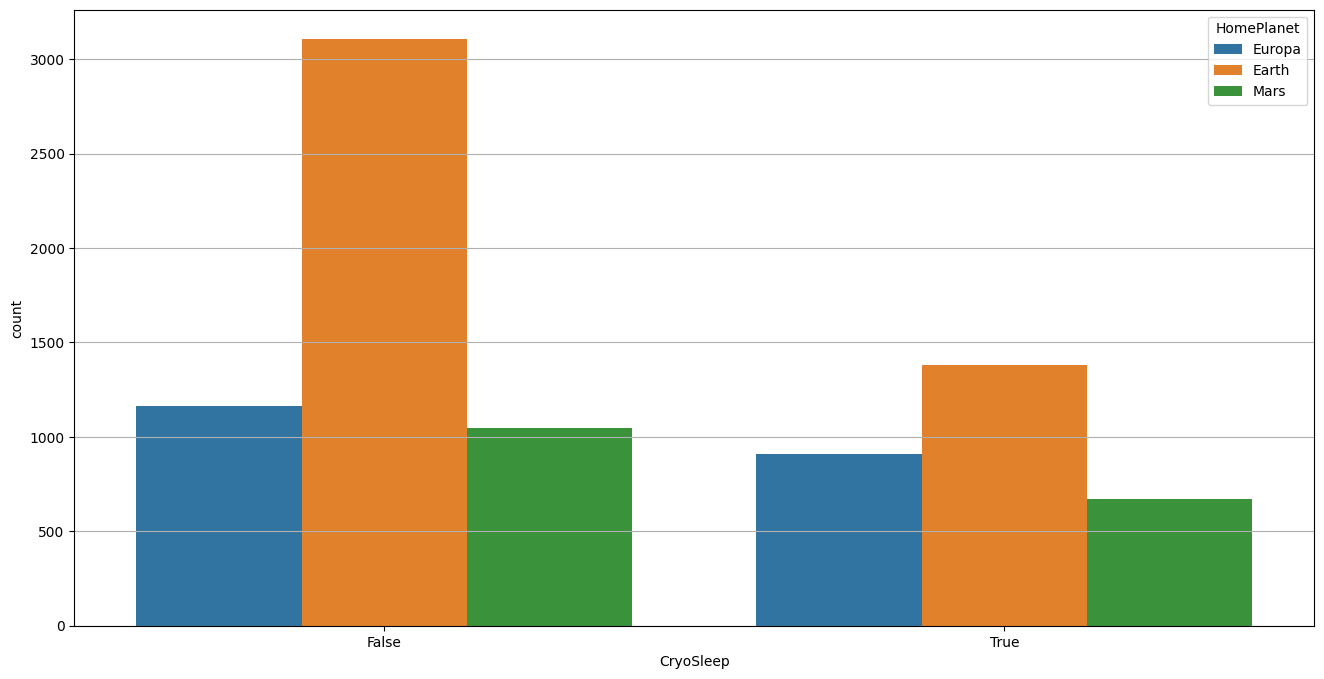

In [7]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['CryoSleep'], hue=df_train['HomePlanet'])

#### Destination

<Axes: xlabel='Destination', ylabel='count'>

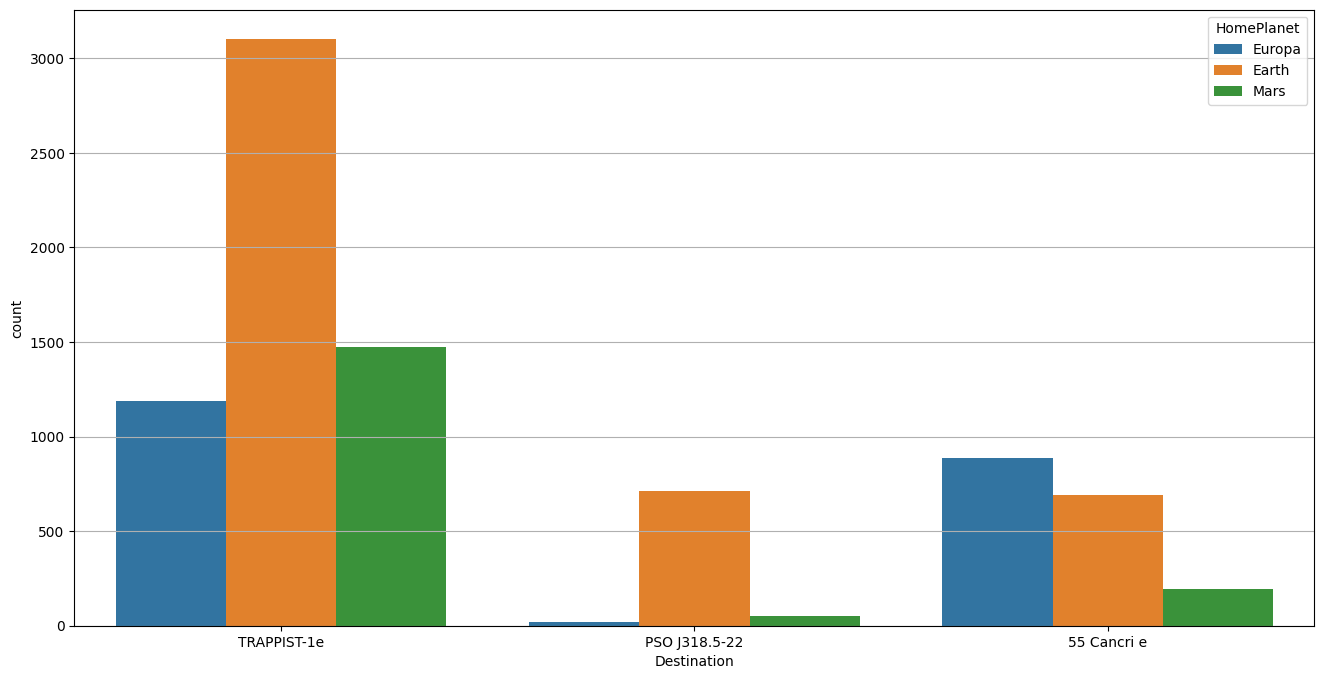

In [8]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['Destination'], hue=df_train['HomePlanet'])

#### VIP

<Axes: xlabel='VIP', ylabel='count'>

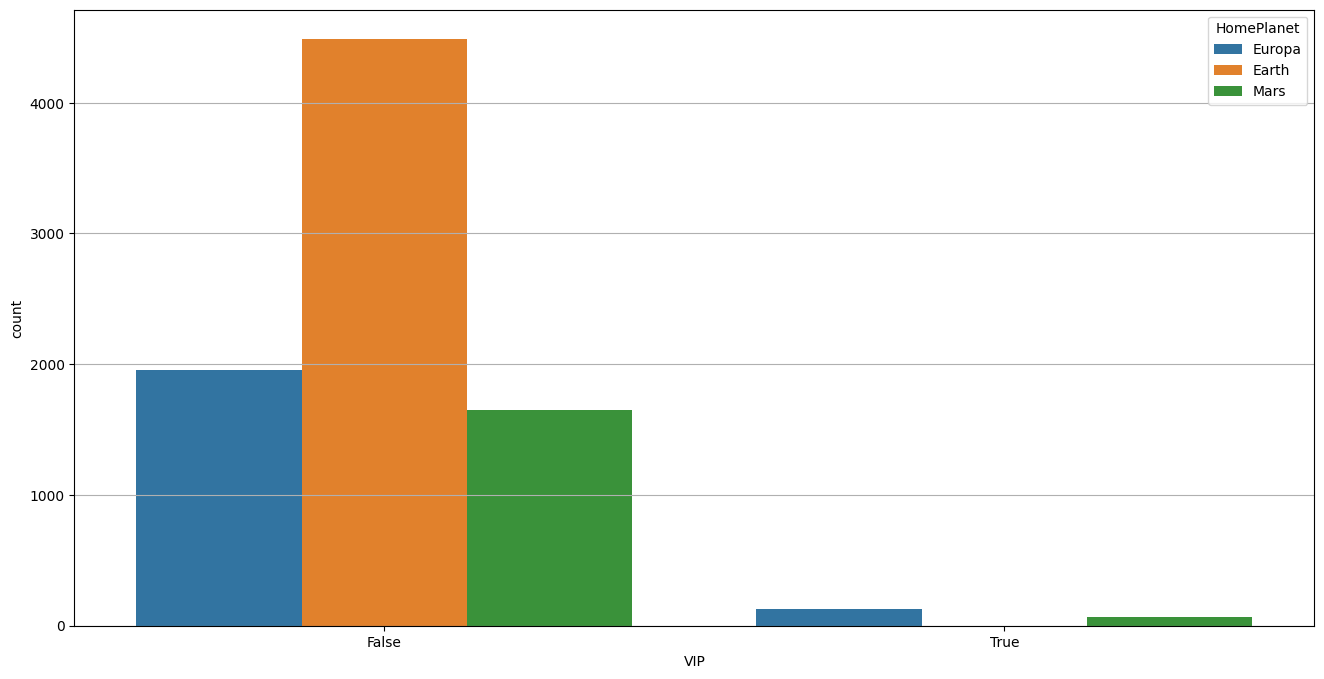

In [9]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['VIP'], hue=df_train['HomePlanet'])

#### Age

<Axes: xlabel='Age', ylabel='Count'>

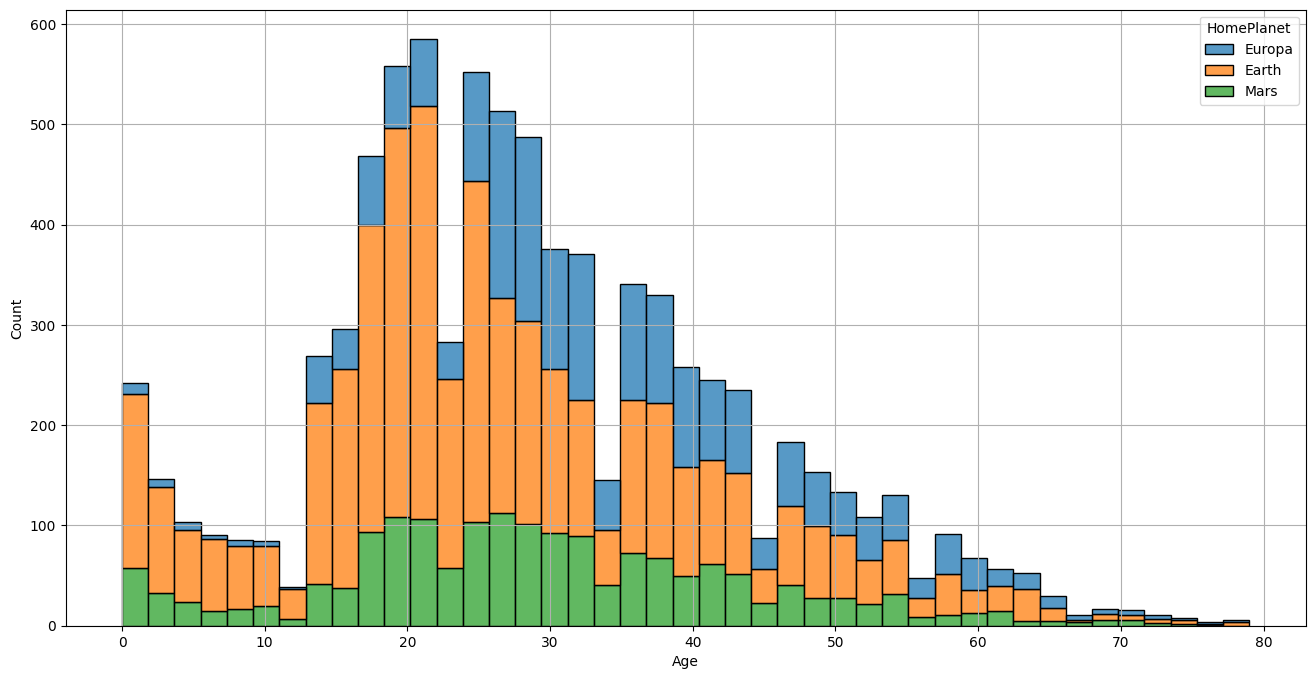

In [10]:
plt.figure(figsize=(16,8))
plt.grid()
sns.histplot(data=df_train, x='Age', hue='HomePlanet', multiple='stack')

#### Transported

<Axes: xlabel='Transported', ylabel='count'>

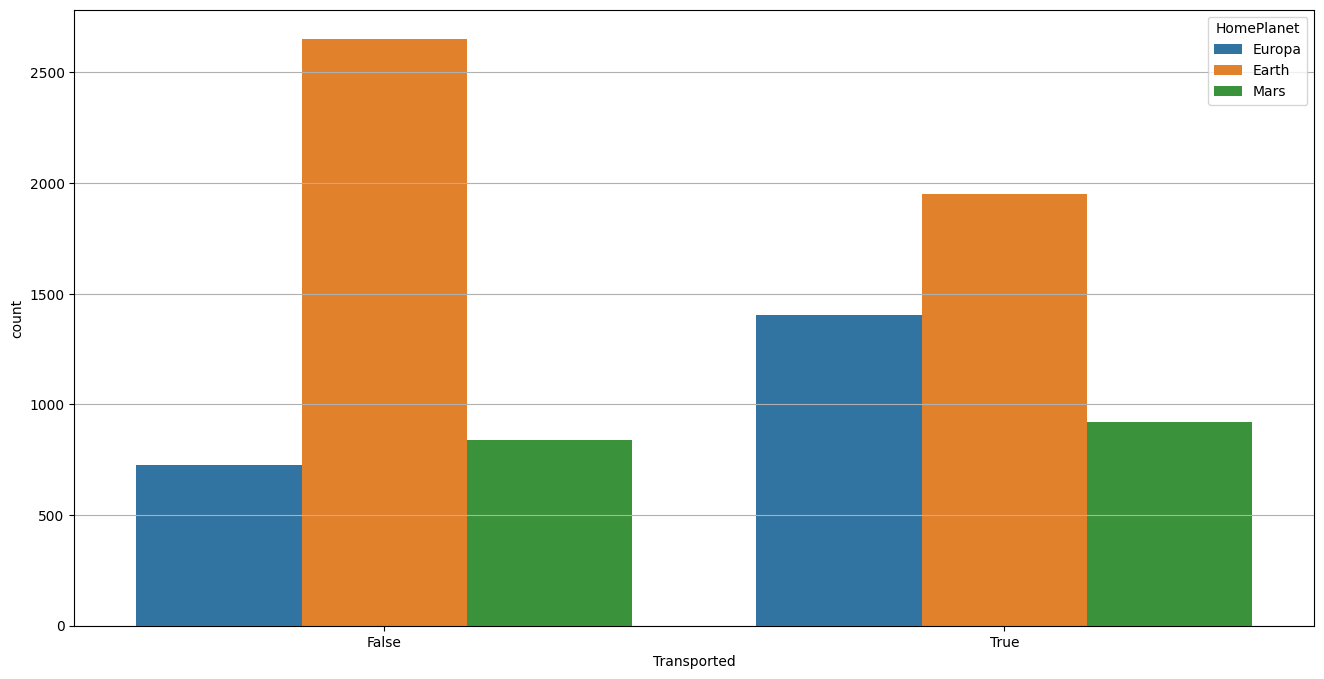

In [11]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['Transported'], hue=df_train['HomePlanet'])

### Cryosleep

#### Destination

<Axes: xlabel='Destination', ylabel='count'>

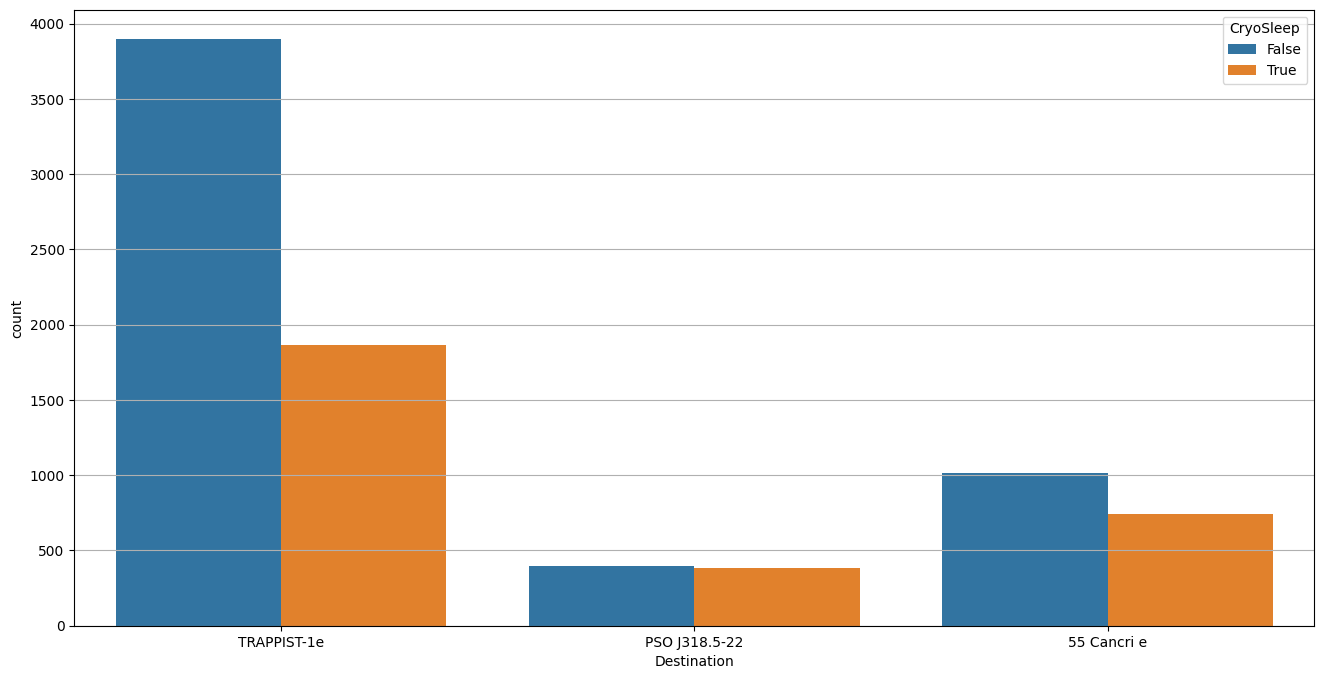

In [12]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['Destination'], hue=df_train['CryoSleep'])

#### VIP

<Axes: xlabel='VIP', ylabel='count'>

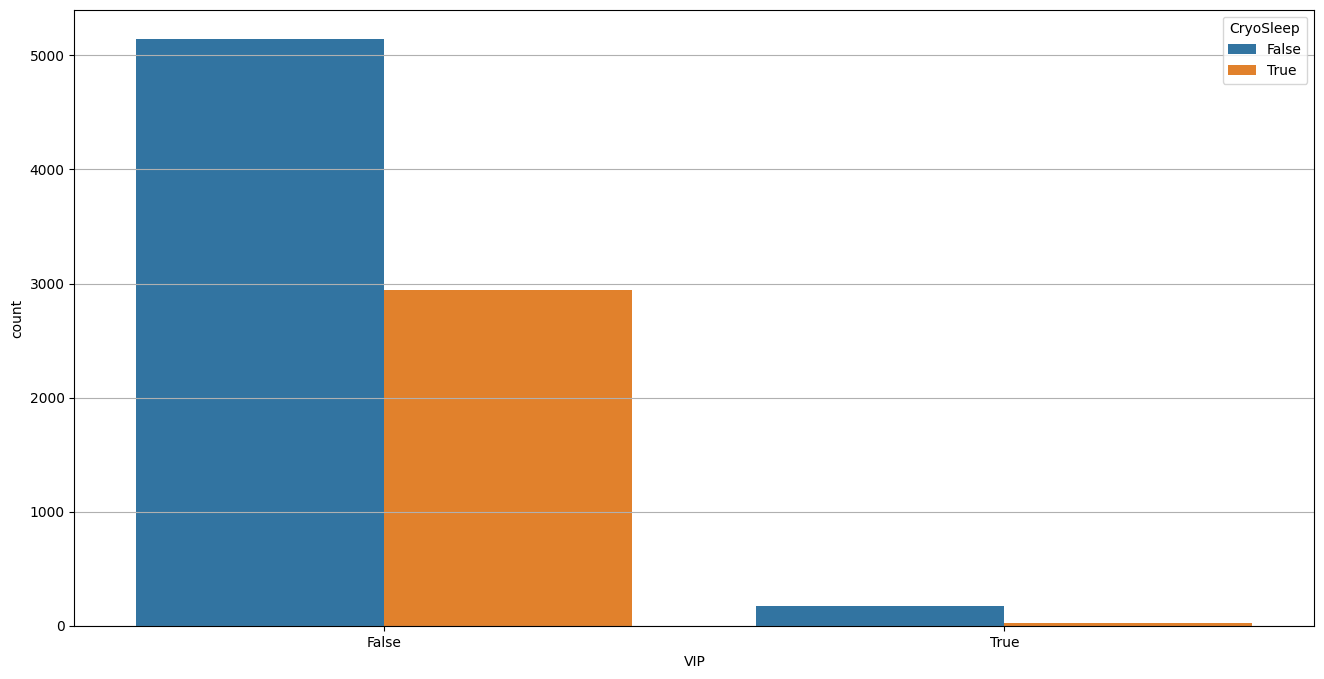

In [13]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['VIP'], hue=df_train['CryoSleep'])

#### Age

<Axes: xlabel='Age', ylabel='Count'>

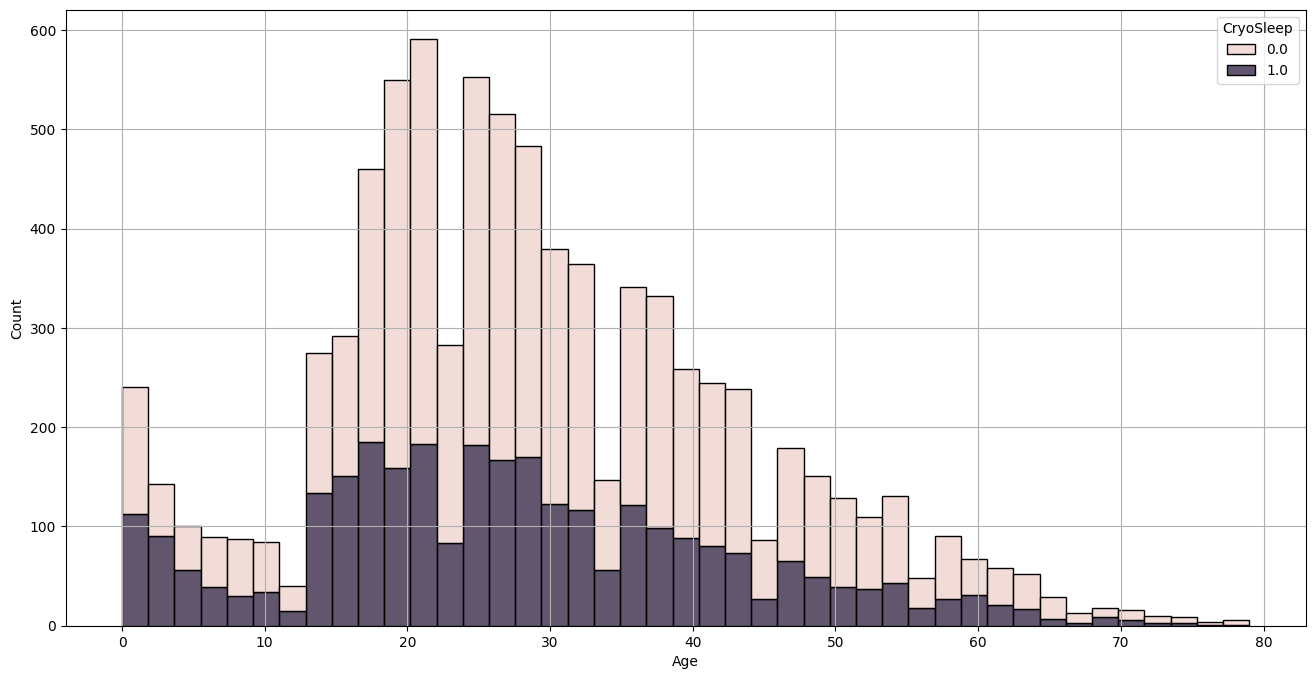

In [14]:
plt.figure(figsize=(16,8))
plt.grid()
sns.histplot(data=df_train, x='Age', hue='CryoSleep', multiple='stack')

#### Transported

<Axes: xlabel='Transported', ylabel='count'>

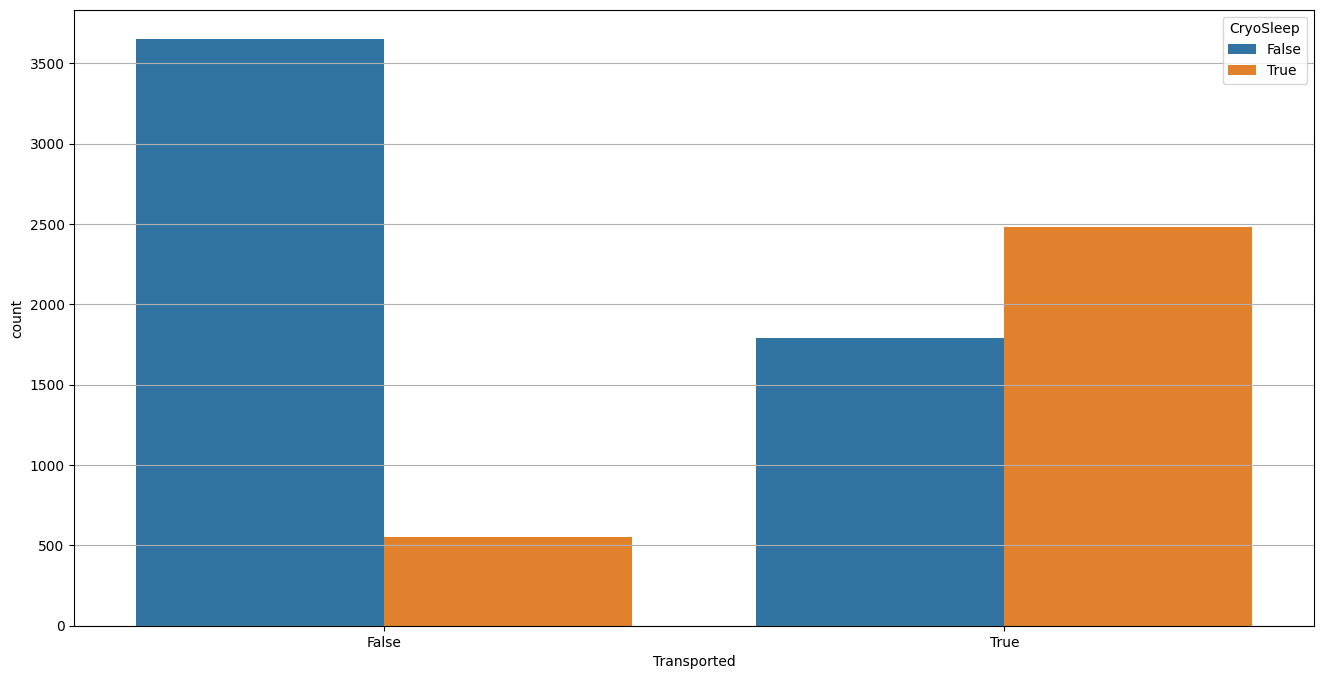

In [15]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['Transported'], hue=df_train['CryoSleep'])

### Destination

#### VIP

<Axes: xlabel='VIP', ylabel='count'>

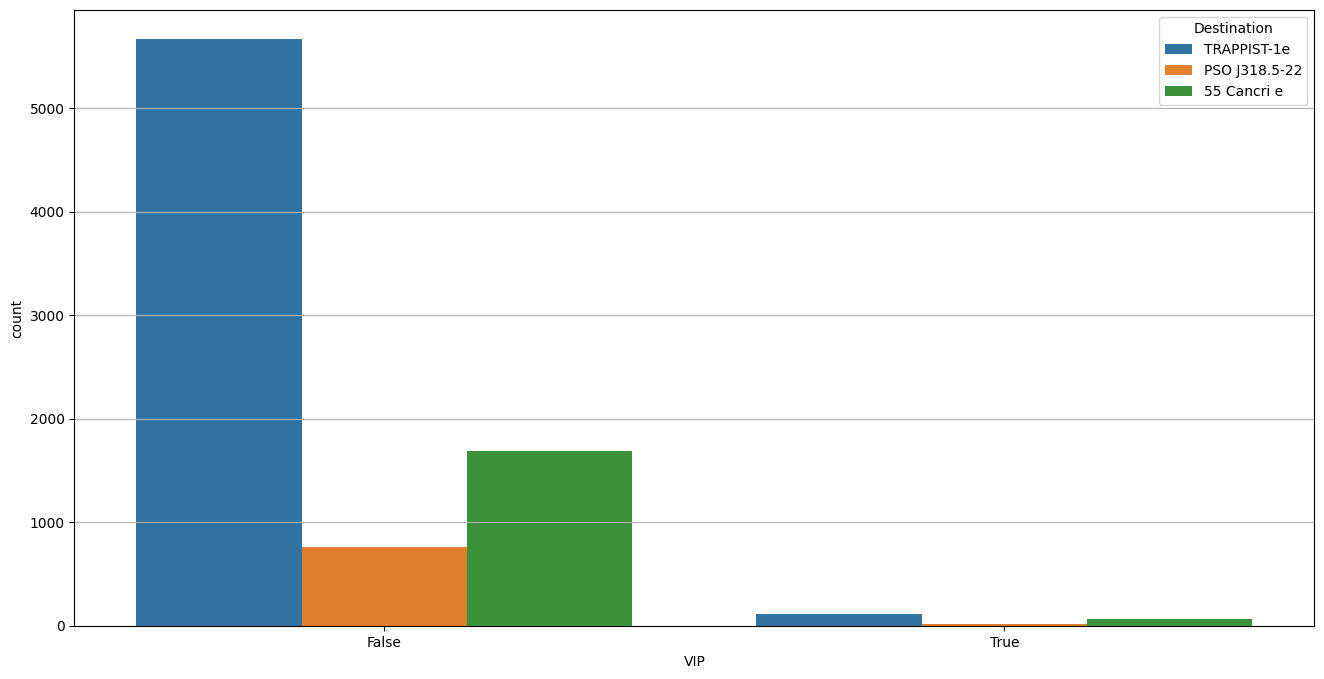

In [16]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['VIP'], hue=df_train['Destination'])

#### Age

<Axes: xlabel='Age', ylabel='Count'>

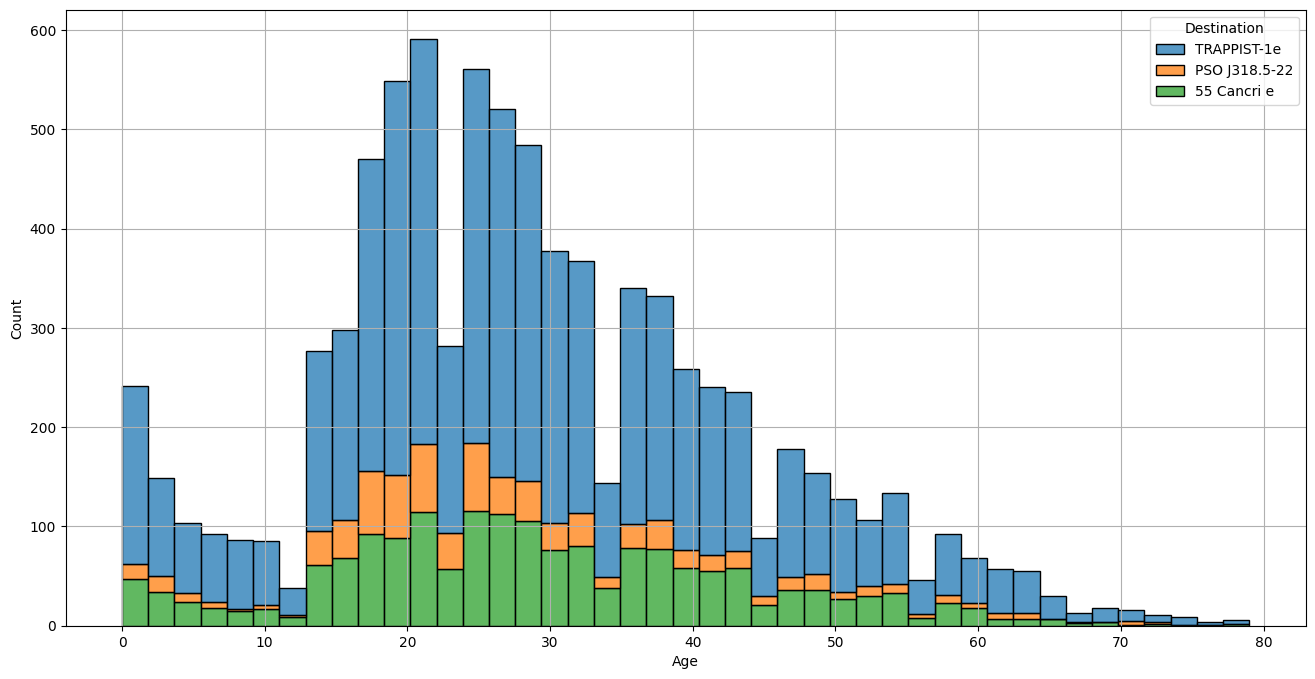

In [17]:
plt.figure(figsize=(16,8))
plt.grid()
sns.histplot(data=df_train, x='Age', hue='Destination', multiple='stack')

#### Transported

<Axes: xlabel='Transported', ylabel='count'>

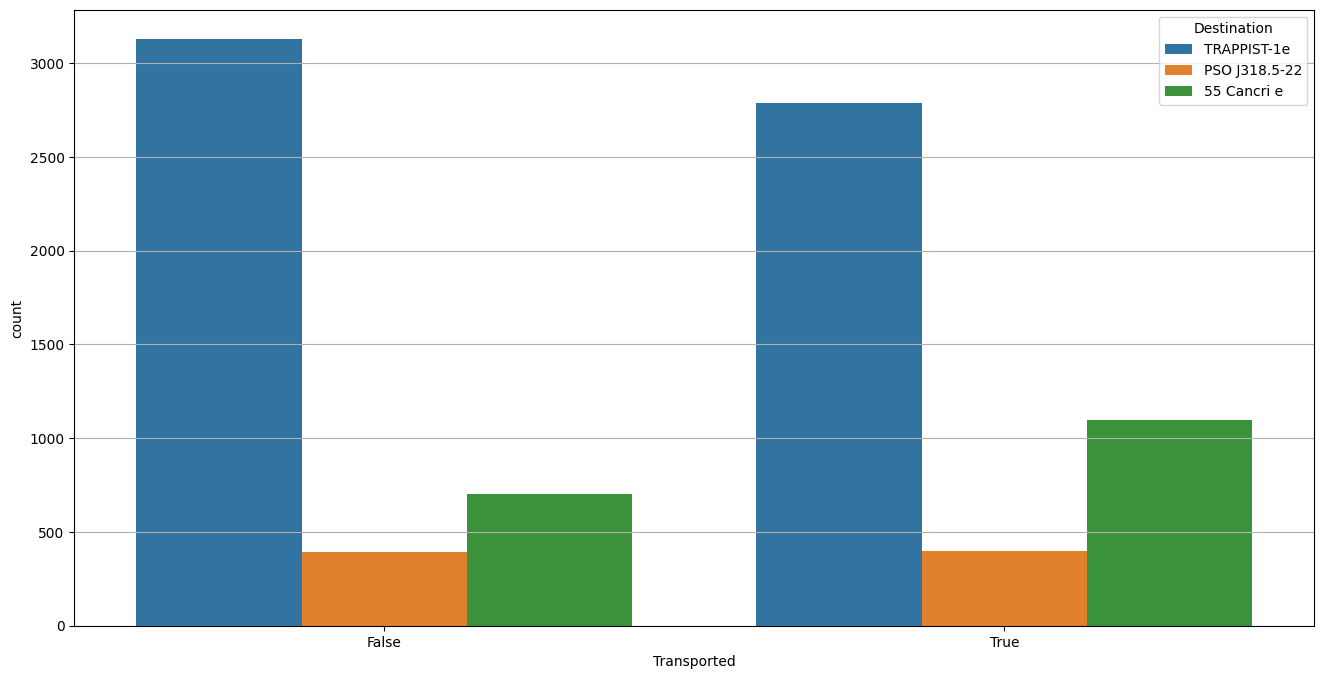

In [18]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['Transported'], hue=df_train['Destination'])

### VIP

#### Age

<Axes: xlabel='Age', ylabel='Count'>

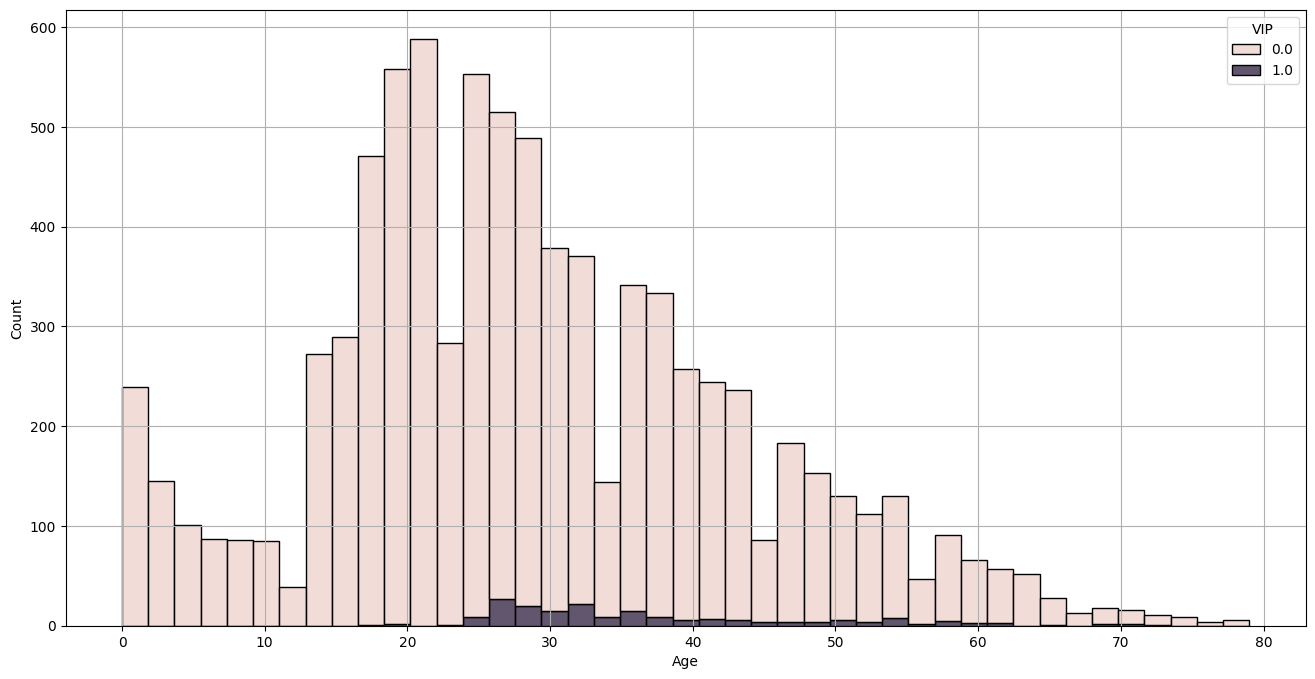

In [19]:
plt.figure(figsize=(16,8))
plt.grid()
sns.histplot(data=df_train, x='Age', hue='VIP', multiple='stack')

#### Transported

<Axes: xlabel='Transported', ylabel='count'>

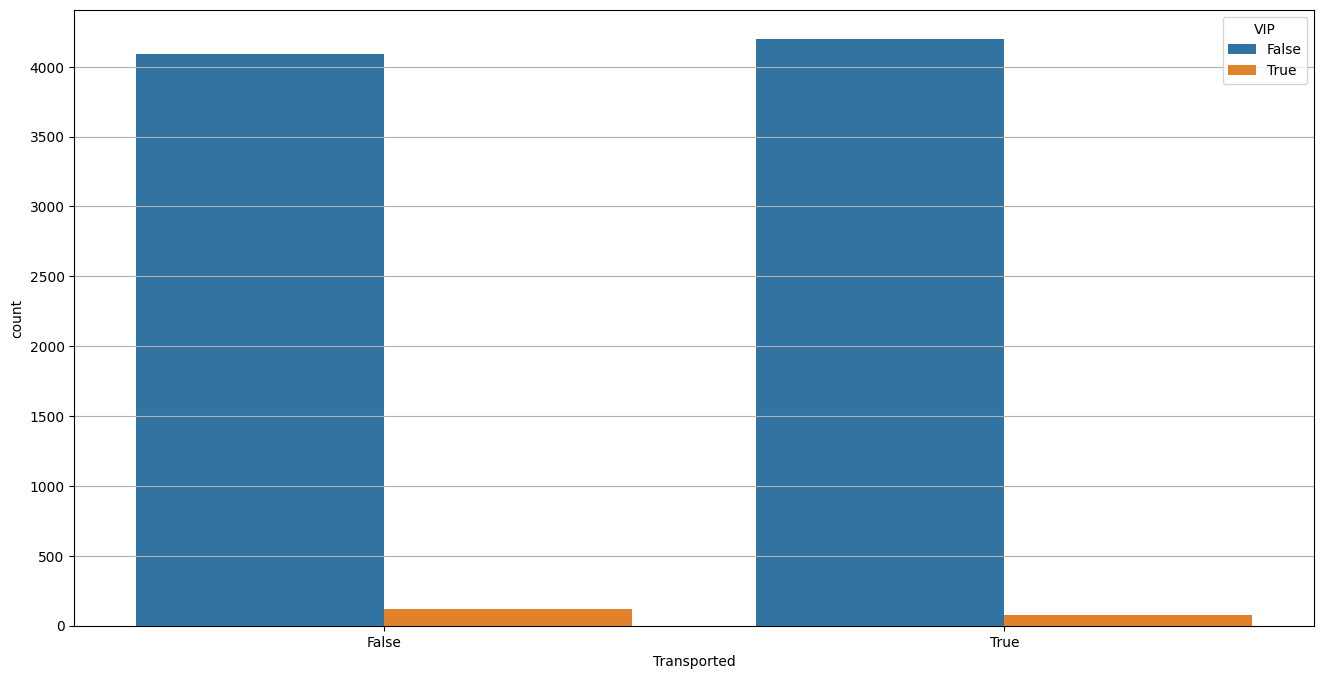

In [20]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(x=df_train['Transported'], hue=df_train['VIP'])

### Age

#### Transported

<Axes: xlabel='Age', ylabel='Count'>

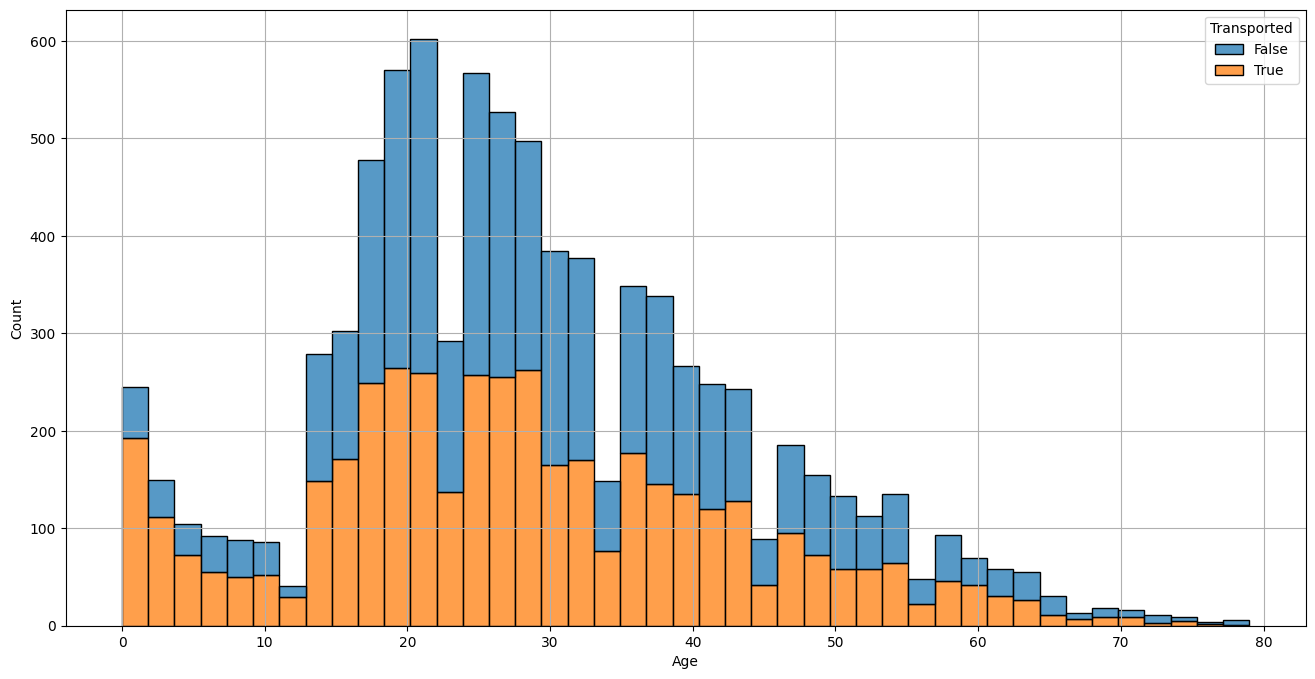

In [21]:
plt.figure(figsize=(16,8))
plt.grid()
sns.histplot(data=df_train, x='Age', hue='Transported', multiple='stack')

# Feature Engineering

In [22]:
#Classify people by age
def process_age(row):
    if row < 6:
        return 'EarlyChild'
    elif row < 12:
        return 'Childhood'
    elif row < 18:
        return 'Teen'
    elif row < 35:
        return 'YoungAdult'
    elif row < 60:
        return 'Adult'
    else:
        return 'Elder'

#Codify the boolean values to 1, 0
def process_bin(row):
    if row == True:
        return 1
    else:
        return 0
# Returns 1 is the amount in the row is greater than 0
def process_num(row):
    if row > 0:
        return 1
    else:
        return 0

# Collects the Deck, Number and Side of each cabins and returns them in a list
def process_cabin(row):
    pattern = r'([A-Z])+/(\d+)/(P|S)'
    result = re.search(pattern, str(row))
    return [result[1], result[2], result[3]]

#Classifies the cabin number
def process_num_cabin(row):
    row = float(row)
    if row < 201:
        return '1-200'
    elif row < 401:
        return '201-400'
    elif row < 601:
        return '401-600'
    elif row < 801:
        return '601-800'
    elif row < 1001:
        return '801-1000'
    elif row < 1201:
        return '1001-1200'
    elif row < 1401:
        return '1201-1400'
    elif row < 1601:
        return '1401-1600'
    elif row < 1801:
        return '1600-1800'
    else:
        return '>1800'

In [23]:
#Replane NaN values using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

X = pd.concat([df_train.select_dtypes(['int', 'float']), 
               pd.DataFrame(imputer.fit_transform(df_train.select_dtypes('object')), columns=imputer.get_feature_names_out())],axis=1)

X_test = pd.concat([df_test.select_dtypes(['int', 'float']), 
               pd.DataFrame(imputer.transform(df_test.select_dtypes('object')), columns=imputer.get_feature_names_out())],axis=1)
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,39.0,0.0,0.0,0.0,0.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,24.0,109.0,9.0,25.0,549.0,44.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,16.0,303.0,70.0,151.0,565.0,2.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,18.0,0.0,0.0,0.0,0.0,0.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,26.0,0.0,0.0,1872.0,1.0,0.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [24]:
#Process Age column
X['Age'] = X['Age'].apply(process_age)
X_test['Age'] = X_test['Age'].apply(process_age)

#Process CryoSleep column
X['CryoSleep'] = X['CryoSleep'].apply(process_bin)
X_test['CryoSleep'] = X_test['CryoSleep'].apply(process_bin)

#Process VIP column
X['VIP'] = X['VIP'].apply(process_bin)
X_test['VIP'] = X_test['VIP'].apply(process_bin)

#Process Lux columns    
for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    X[i] = X[i].apply(process_num)
    X_test[i] = X_test[i].apply(process_num)

#Process Cabin column
cabin = X['Cabin'].apply(process_cabin)
decks = [deck[0] for deck in cabin]
nums = [num[1] for num in cabin]
sides = [side[2] for side in cabin]
X['Deck'] = decks
X['Num'] = nums
X['Num'] = X['Num'].apply(process_num_cabin)
X['Side'] = sides

cabin = X_test['Cabin'].apply(process_cabin)
decks = [deck[0] for deck in cabin]
nums = [num[1] for num in cabin]
sides = [side[2] for side in cabin]
X_test['Deck'] = decks
X_test['Num'] = nums
X_test['Num'] = X_test['Num'].apply(process_num_cabin)
X_test['Side'] = sides

#Create column that indicates if at least one of the luxury services was used
X['Lux'] = X[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=1).apply(process_num)
X_test['Lux'] = X_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=1).apply(process_num)

#Save Ids
PId =X_test.pop('PassengerId')

#Drop unnecesary columns
X_test.drop(['Cabin', 'Name'], axis=1, inplace=True)
X.drop(['Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

#Save Transported column
Y = df_train['Transported'].apply(process_bin)

In [25]:
X

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP,Deck,Num,Side,Lux
0,Adult,0,0,0,0,0,Europa,0,TRAPPIST-1e,0,B,1-200,P,0
1,YoungAdult,1,1,1,1,1,Earth,0,TRAPPIST-1e,0,F,1-200,S,1
2,Adult,1,1,0,1,1,Europa,0,TRAPPIST-1e,1,A,1-200,S,1
3,YoungAdult,0,1,1,1,1,Europa,0,TRAPPIST-1e,0,A,1-200,S,1
4,Teen,1,1,1,1,1,Earth,0,TRAPPIST-1e,0,F,1-200,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Adult,0,1,0,1,1,Europa,0,55 Cancri e,1,A,1-200,P,1
8689,YoungAdult,0,0,0,0,0,Earth,1,PSO J318.5-22,0,G,1401-1600,S,0
8690,YoungAdult,0,0,1,1,0,Earth,0,TRAPPIST-1e,0,G,1401-1600,S,1
8691,YoungAdult,0,1,0,1,1,Europa,0,55 Cancri e,0,E,601-800,S,1


## Visualization with new variables

### Lux

<Axes: xlabel='Lux', ylabel='count'>

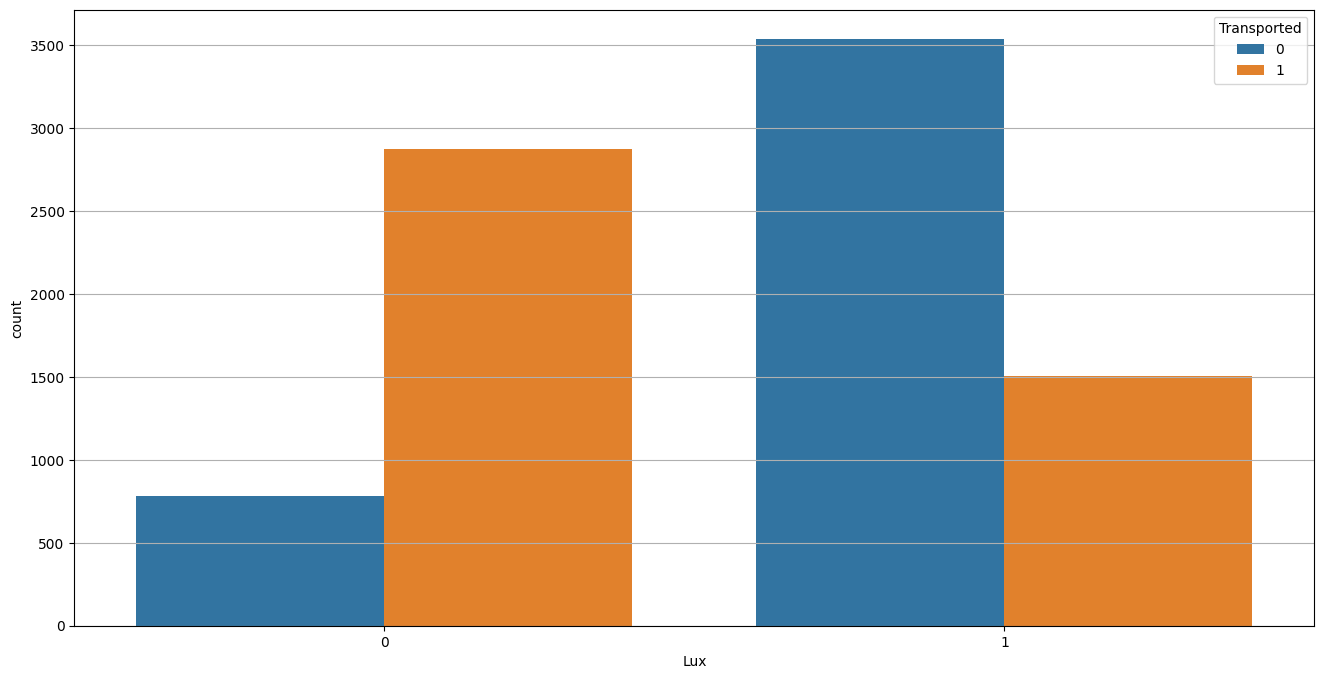

In [26]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='Lux', hue=Y)

### RoomService

<Axes: xlabel='RoomService', ylabel='count'>

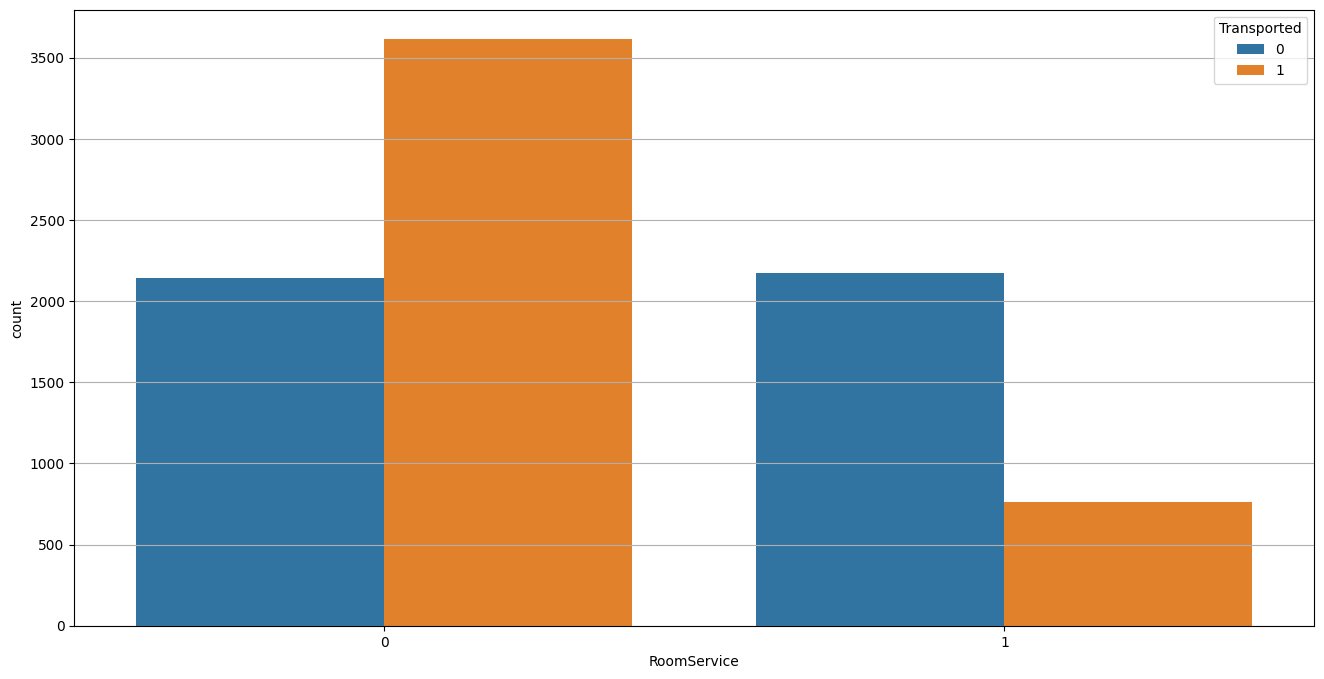

In [27]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='RoomService', hue=Y)

### FoodCourt

<Axes: xlabel='FoodCourt', ylabel='count'>

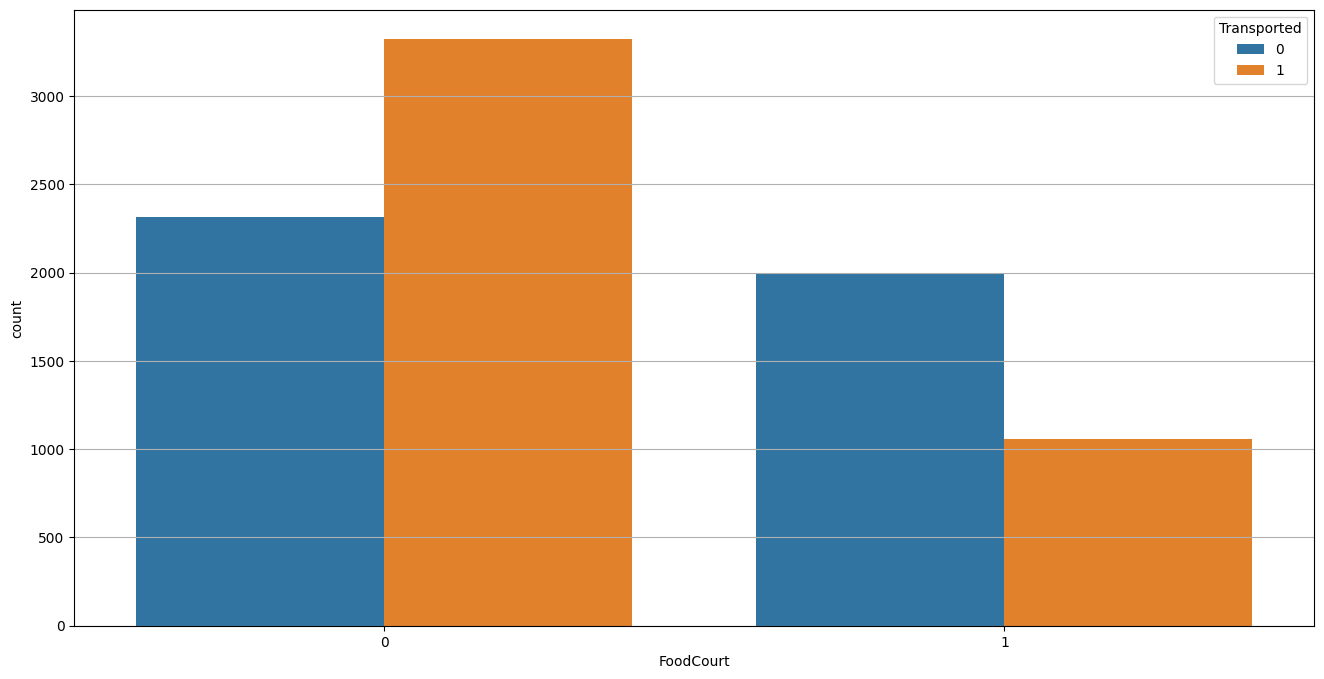

In [28]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='FoodCourt', hue=Y)

### ShoppingMall

<Axes: xlabel='ShoppingMall', ylabel='count'>

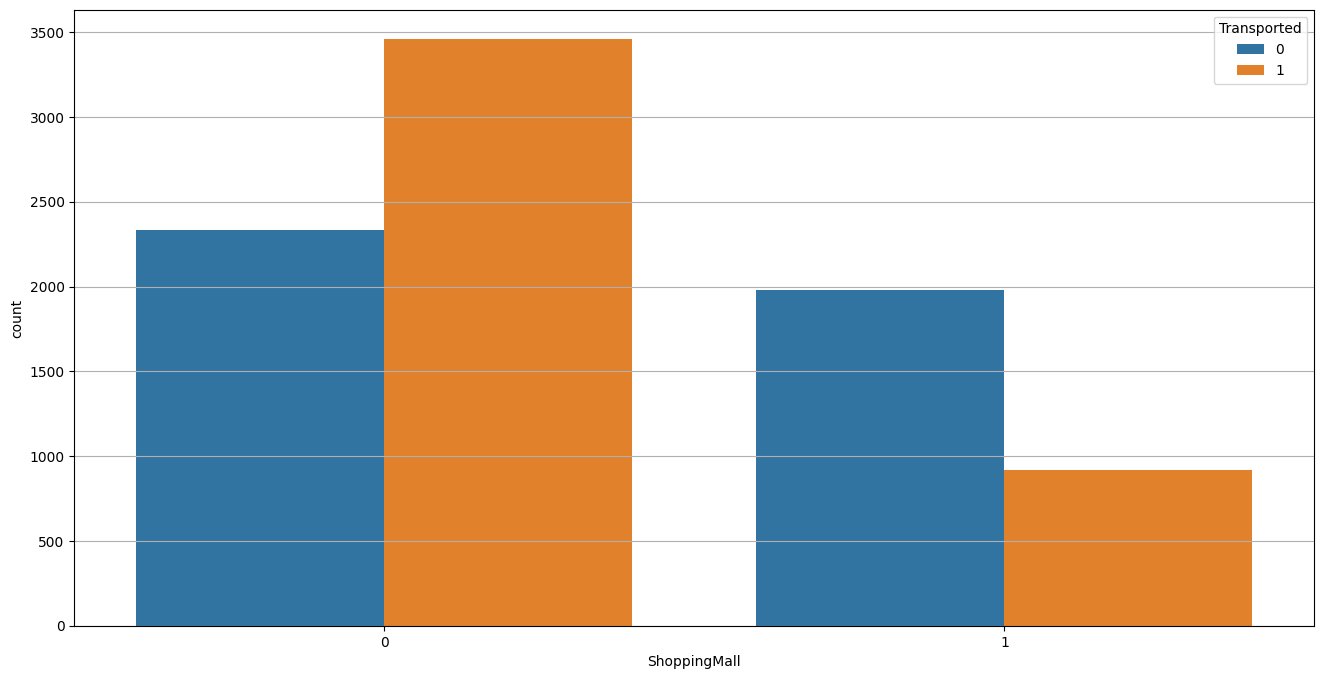

In [29]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='ShoppingMall', hue=Y)

### Spa

<Axes: xlabel='Spa', ylabel='count'>

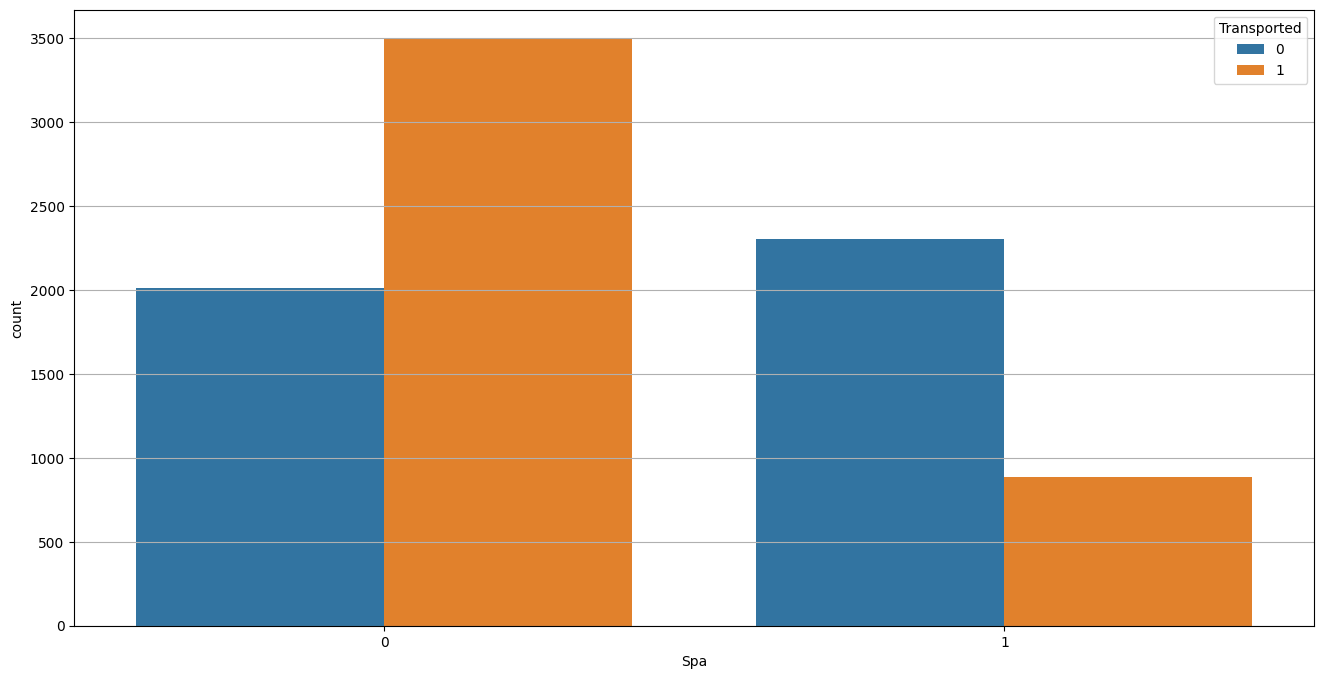

In [30]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='Spa', hue=Y)

### VRDeck

<Axes: xlabel='VRDeck', ylabel='count'>

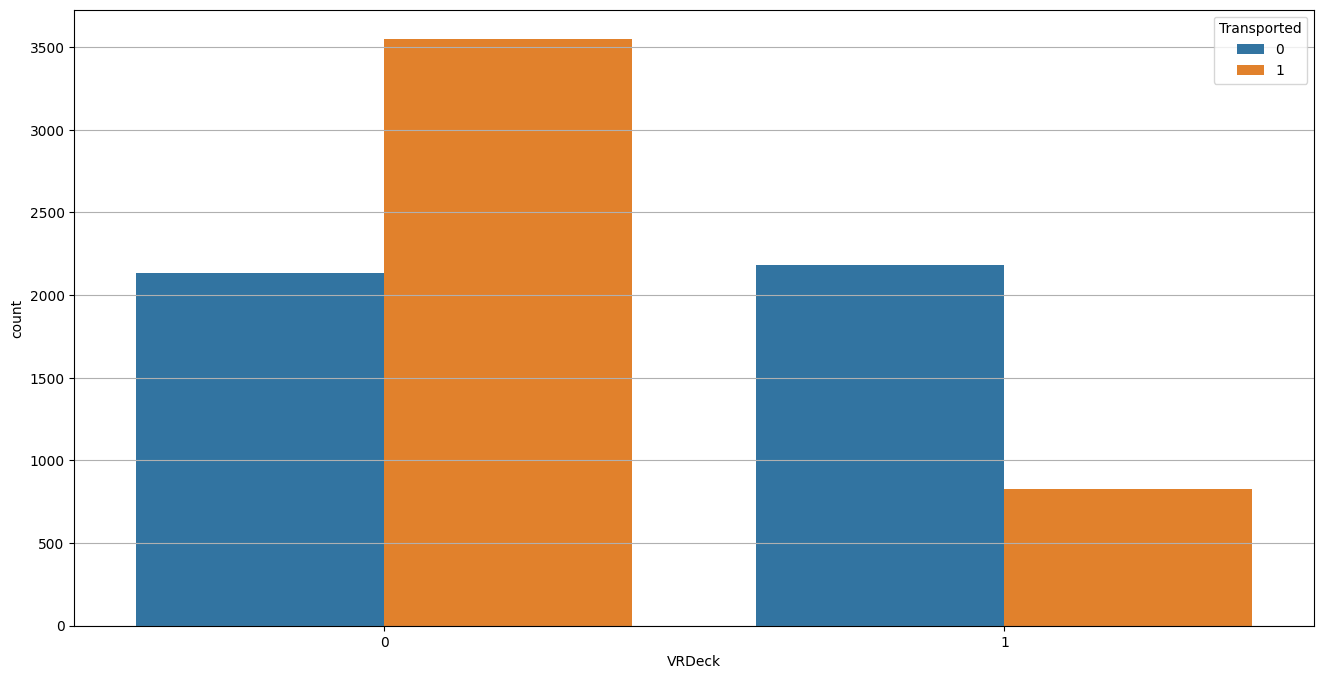

In [31]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='VRDeck', hue=Y)

### Deck

<Axes: xlabel='Deck', ylabel='count'>

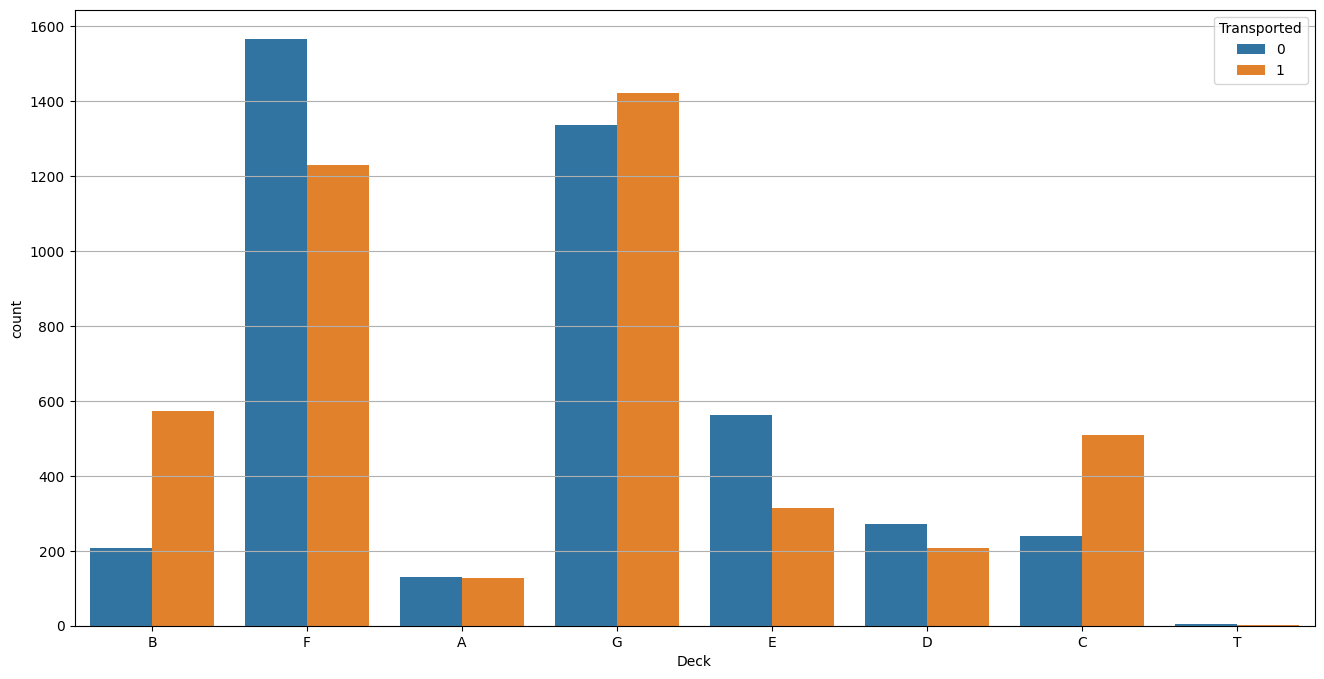

In [32]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='Deck', hue=Y)

### Num

<Axes: xlabel='Num', ylabel='count'>

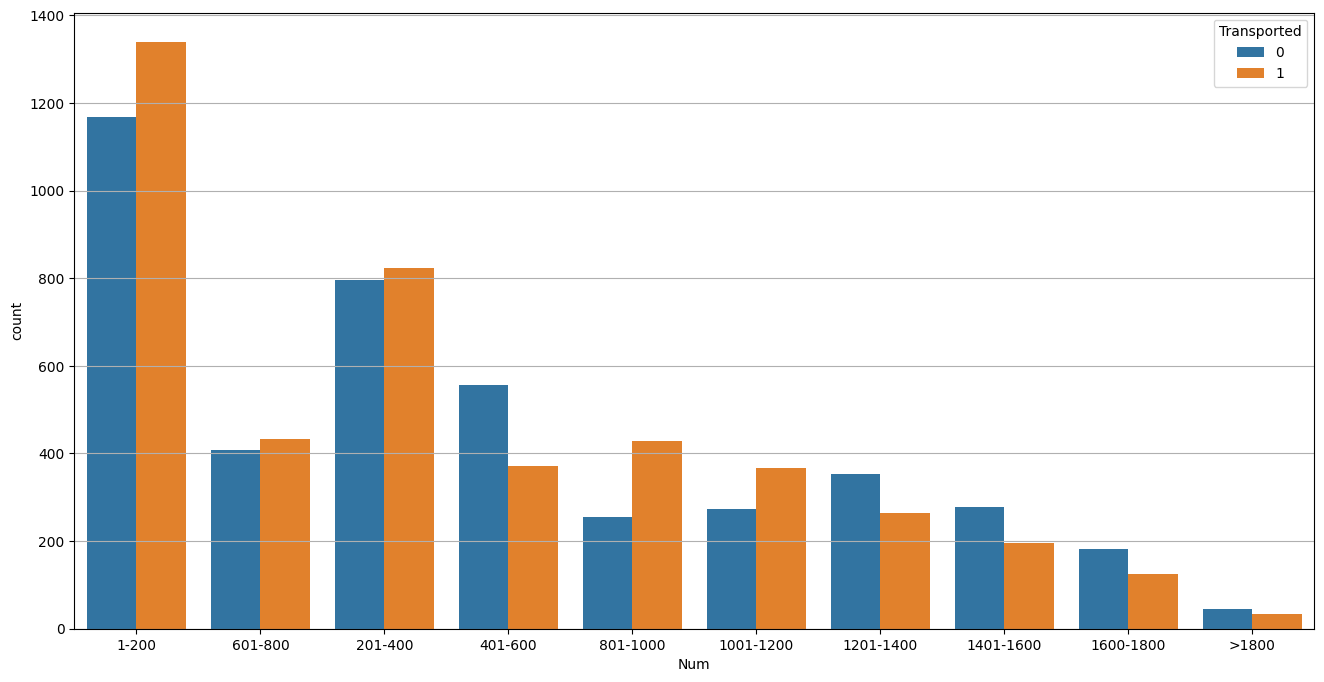

In [33]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='Num', hue=Y)

### Side

<Axes: xlabel='Side', ylabel='count'>

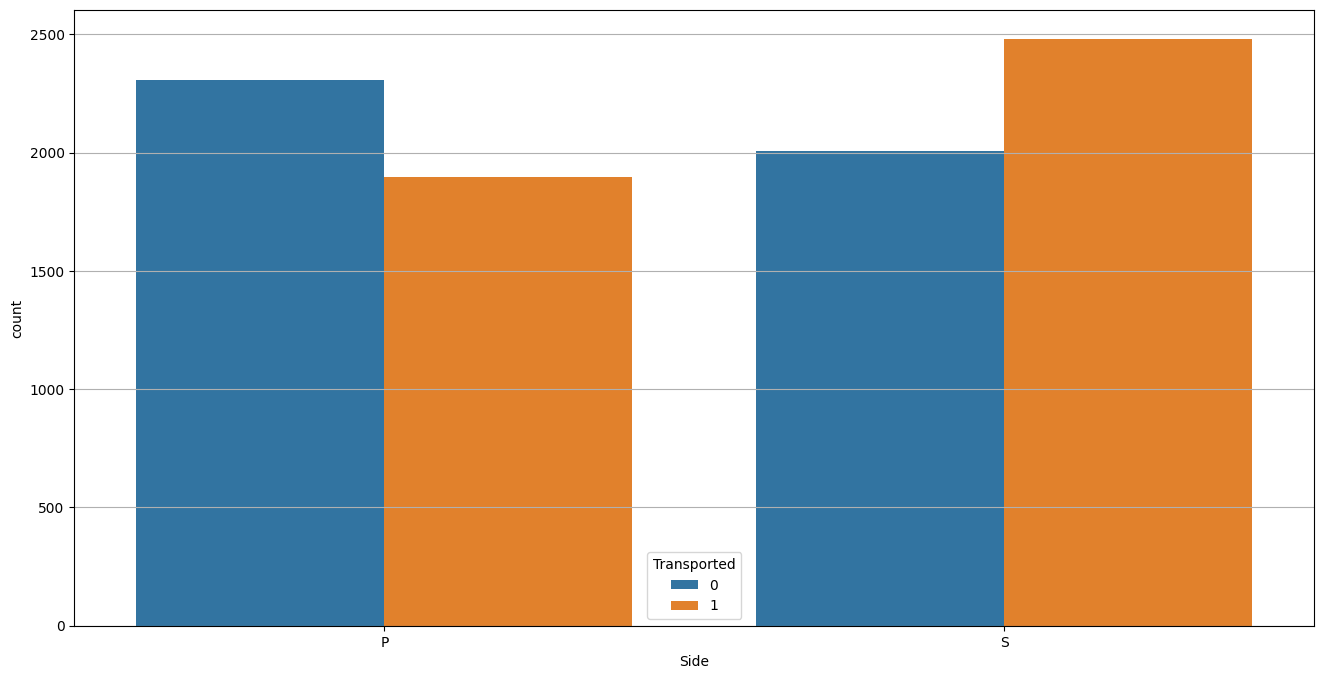

In [34]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='Side', hue=Y)

### Age

<Axes: xlabel='Age', ylabel='count'>

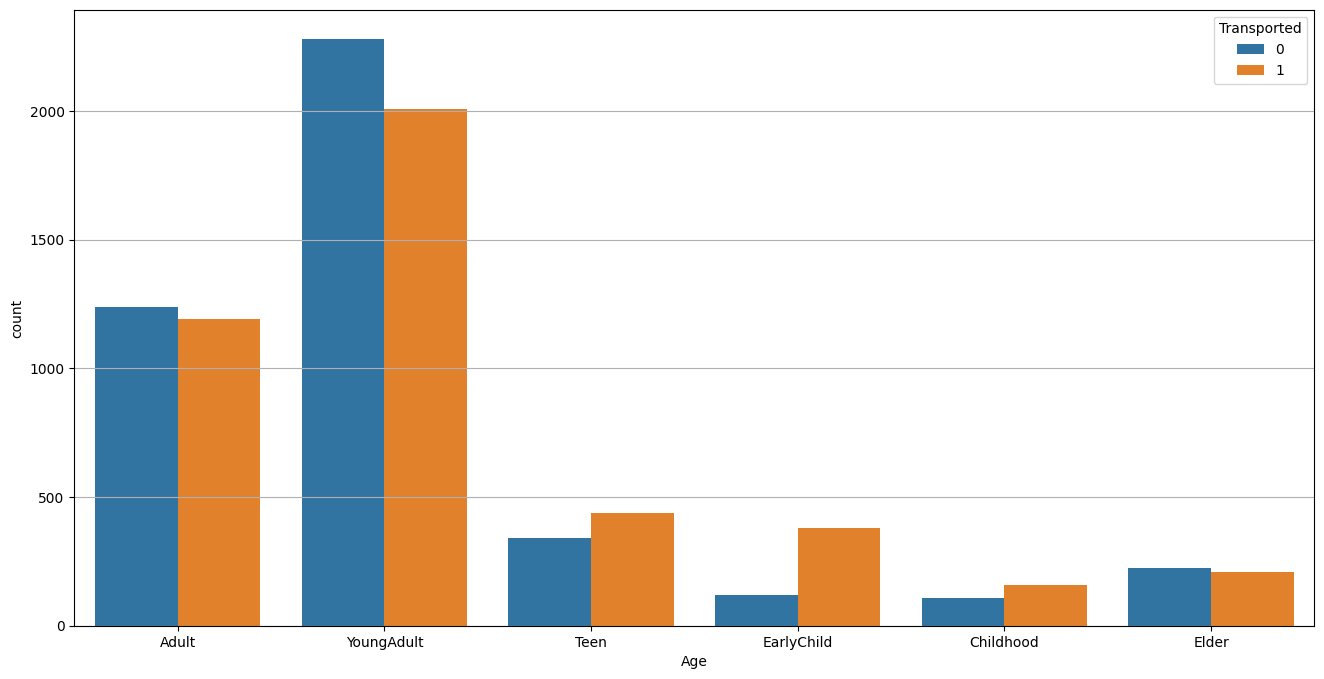

In [35]:
plt.figure(figsize=(16,8))
plt.grid()
sns.countplot(data=X, x='Age', hue=Y)

## Encoding 

In [36]:
#Apply OneHot encoding to the new categorical values
encoder = OneHotEncoder(sparse=False)
X_cat = pd.DataFrame(encoder.fit_transform(X[['Age', 'HomePlanet', 'Destination', 'Deck', 'Num', 'Side']]), columns=encoder.get_feature_names_out())
X_cat_test = pd.DataFrame(encoder.transform(X_test[['Age', 'HomePlanet', 'Destination', 'Deck', 'Num', 'Side']]), columns=encoder.get_feature_names_out())
X_cat

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age_Adult,Age_Childhood,Age_EarlyChild,Age_Elder,Age_Teen,Age_YoungAdult,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,...,Num_1201-1400,Num_1401-1600,Num_1600-1800,Num_201-400,Num_401-600,Num_601-800,Num_801-1000,Num_>1800,Side_P,Side_S
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8690,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8691,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
#Concatenate the result dfs
X = pd.concat([X_cat, X.drop(['Age', 'HomePlanet', 'Destination', 'Deck', 'Num', 'Side'],axis=1)],axis=1)
X_test = pd.concat([X_cat_test, X_test.drop(['Age', 'HomePlanet', 'Destination', 'Deck', 'Num', 'Side'],axis=1)],axis=1)
X

,Age_Adult,Age_Childhood,Age_EarlyChild,Age_Elder,Age_Teen,Age_YoungAdult,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,...,Side_P,Side_S,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Lux
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1,1,1,1,1,0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1,1,0,1,1,0,1,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0,1,1,1,1,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0,1,0,1,1,0,1,1
8689,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,1,0,0
8690,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,0,1,1,0,0,0,1
8691,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0,1,0,1,1,0,0,1


In [38]:
X_test

,Age_Adult,Age_Childhood,Age_EarlyChild,Age_Elder,Age_Teen,Age_YoungAdult,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,...,Side_P,Side_S,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Lux
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,1,0,1,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0,0,0,0,0,1,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0,1,0,1,1,0,0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,0,1,0,0
4273,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,1,1,1,1,0,0,1
4274,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0,0,0,0,0,1,0,0
4275,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0,1,0,0,1,0,0,1


## Correlation

As a result of the encoding we have 40 columns, and as we saw in the plots not all of them are as useful. 

Therefore we calculte the correlation with the Transported column and select the ones with with the higher value

In [39]:
X_ = X.copy()
X_['Y'] = Y
#Columns with an absolute correlation greater than 0.1 with the response column(Transported), expect from that column itself
X_.corr().loc[(abs(X_.corr()['Y']) > 0.1) & (X_.corr()['Y']!= 1) ]['Y'].sort_values(ascending=False)

CryoSleep                  0.460132
HomePlanet_Europa          0.176916
Deck_B                     0.144733
Age_EarlyChild             0.125312
Destination_55 Cancri e    0.108722
Deck_C                     0.108193
Side_S                     0.101397
Side_P                    -0.101397
HomePlanet_Earth          -0.168845
FoodCourt                 -0.232816
ShoppingMall              -0.263792
VRDeck                    -0.332175
Spa                       -0.344050
RoomService               -0.347928
Lux                       -0.481628
Name: Y, dtype: float64

In [40]:
#Select those columns
X_red = X_[X_.corr().loc[(abs(X_.corr()['Y']) > 0.1) & (X_.corr()['Y']!= 1) ]['Y'].index].copy()
X_test_red = X_test[X_red.columns]
X_red

,Age_EarlyChild,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Deck_B,Deck_C,Side_P,Side_S,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Lux
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,1,0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1,1,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0,1,0,1,1,0,1
8689,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0
8690,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,0,1
8691,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1,0,1,1,0,1


Side_P and Side_S columns are mutually exclusive, this means that none of the rows have the same value in both columns and have the same correlation with different sign.

Having the two of them it's reduntant, so it's better to drop one. 

In [41]:
X.drop(['Side_P'], inplace=True, axis=1)
X_red.drop(['Side_P'], inplace=True, axis=1)
X_test.drop(['Side_P'], inplace=True, axis=1)
X_test_red.drop(['Side_P'], inplace=True, axis=1)

/tmp/ipykernel_21/2227955582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_red.drop(['Side_P'], inplace=True, axis=1)


In [42]:
X_red

,Age_EarlyChild,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Deck_B,Deck_C,Side_S,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Lux
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0,1,1,0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,1,1,1,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,1,1,0,1
8689,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0
8690,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,0,1
8691,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1,0,1,1,0,1


# Model training

In [43]:
def predict(X_train,y_train,X_val, y_val,model):
    #Predicts and contrast different scores with the training and validation set
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    print("---Training set---\n")
    print("\t-Precision Score: {:.4f}\n".format(precision_score(y_train,y_train_pred)))
    print("\t-Accuracy Score: {:.4f}\n".format(accuracy_score(y_train,y_train_pred)))
    print("\t-F1 Score: {:.4f}\n".format(f1_score(y_train,y_train_pred)))
    print("\t-Recall Score: {:.4f}\n".format(recall_score(y_train, y_train_pred)))
    print("---Validation set---\n")
    print("\t-Precision Score: {:.4f}\n".format(precision_score(y_val,y_val_pred)))
    print("\t-Accuracy Score: {:.4f}\n".format(accuracy_score(y_val,y_val_pred)))
    print("\t-F1 Score: {:.4f}\n".format(f1_score(y_val,y_val_pred)))
    print("\t-Recall Score: {:.4f}\n".format(recall_score(y_val, y_val_pred)))

In [44]:
#Split datasets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=42, test_size=0.2)
X_red_train, X_red_val, Y_train, Y_val = train_test_split(X_red, Y, random_state=42, test_size=0.2)

In [45]:
X_red_train

,Age_EarlyChild,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Deck_B,Deck_C,Side_S,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Lux
2333,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,0,0,1
2589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,1
8302,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,0,0,0,0,1,0
8177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0,1
500,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,0,0,1
5191,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,1,0,1
5390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,1
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1


## Model 1

In [46]:
#Model using the whole dataframe
model1 = SVC(random_state=42)
model1.fit(X_train, Y_train)
predict(X_train, Y_train, X_val, Y_val, model1)

---Training set---

	-Precision Score: 0.8212

	-Accuracy Score: 0.7788

	-F1 Score: 0.7653

	-Recall Score: 0.7166

---Validation set---

	-Precision Score: 0.7940

	-Accuracy Score: 0.7562

	-F1 Score: 0.7430

	-Recall Score: 0.6982



<Axes: >

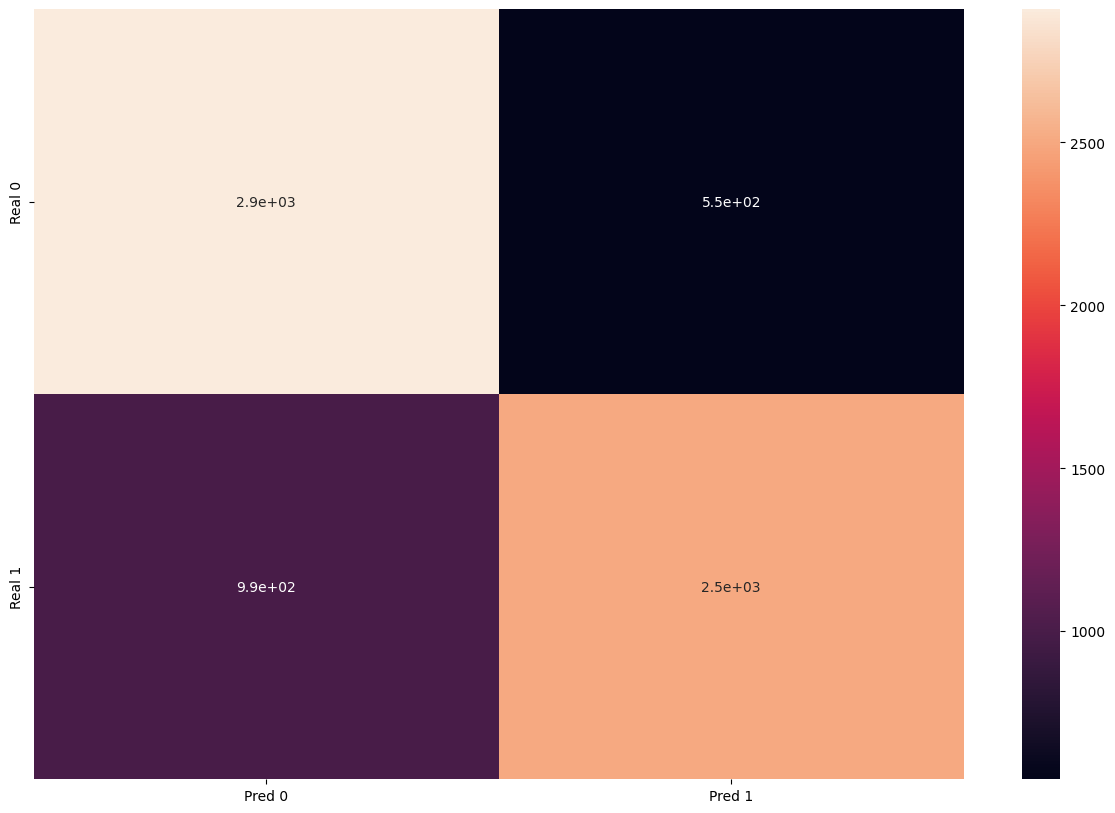

In [47]:
#Confusion matrix with the training data
cf_train = pd.DataFrame(confusion_matrix(Y_train, model1.predict(X_train)), index = ['Real 0', 'Real 1'], columns= ['Pred 0', 'Pred 1'])
plt.figure(figsize=(15,10))
sns.heatmap(cf_train, annot=True)

<Axes: >

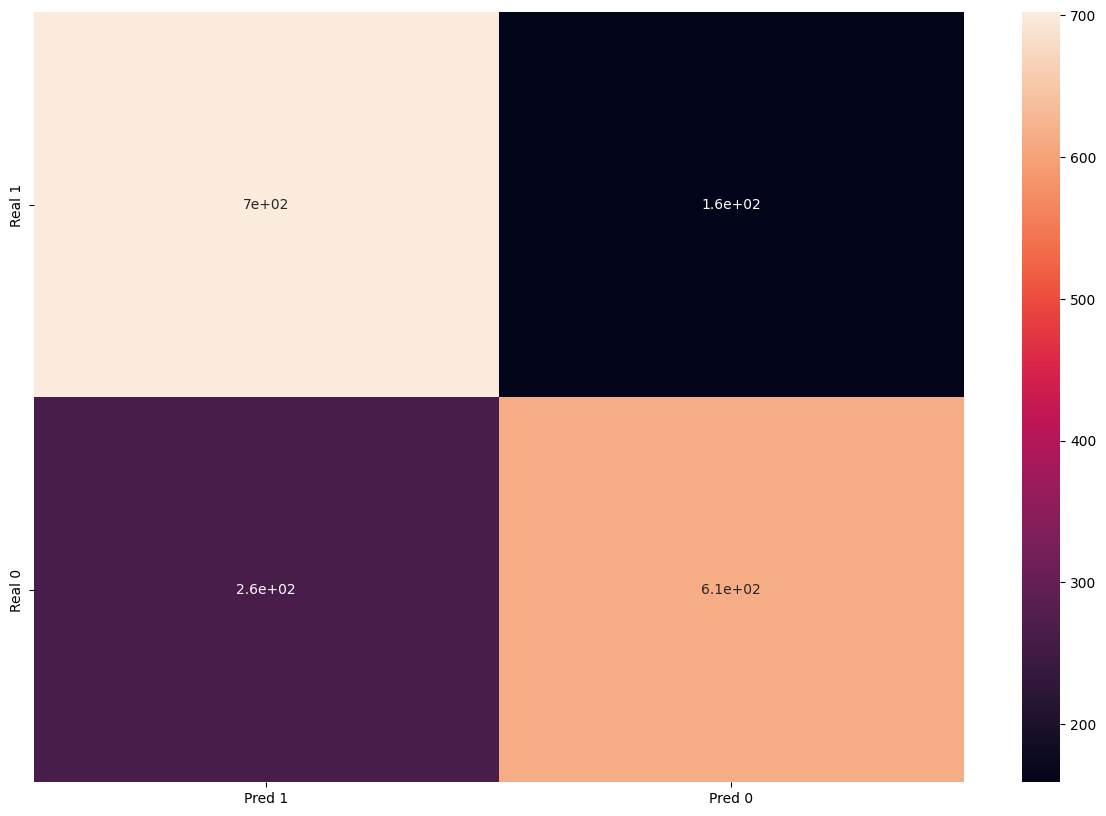

In [48]:
#Confusion matrix with the validation data
cf_val = pd.DataFrame(confusion_matrix(Y_val, model1.predict(X_val)), index = ['Real 1', 'Real 0'], columns= ['Pred 1', 'Pred 0'])
plt.figure(figsize=(15,10))
sns.heatmap(cf_val, annot=True)

## Model 2

In [49]:
#Model using the first reduced dataset
model2 = SVC(random_state=42)
model2.fit(X_red_train, Y_train)
predict(X_red_train, Y_train, X_red_val, Y_val, model2)

---Training set---

	-Precision Score: 0.7823

	-Accuracy Score: 0.7560

	-F1 Score: 0.7465

	-Recall Score: 0.7137

---Validation set---

	-Precision Score: 0.7646

	-Accuracy Score: 0.7458

	-F1 Score: 0.7403

	-Recall Score: 0.7175



<Axes: >

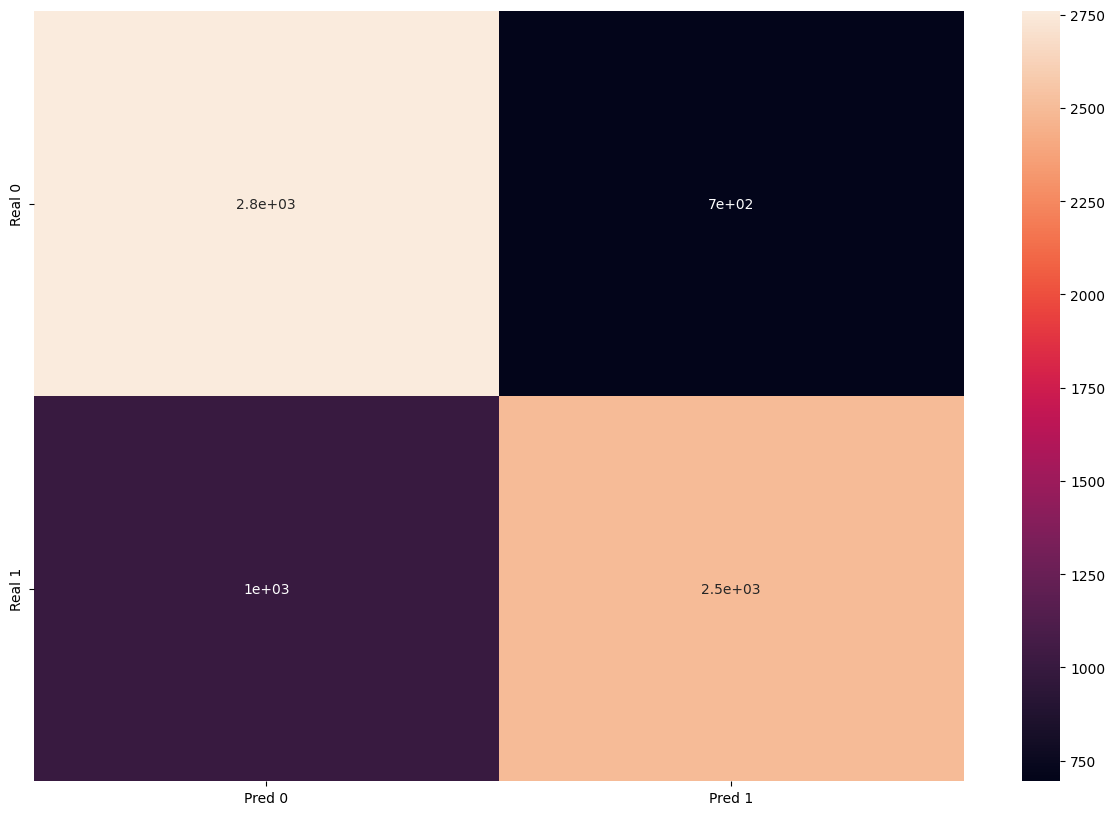

In [50]:
#Matriz de confusión en datos de entrenamiento
cf_train = pd.DataFrame(confusion_matrix(Y_train, model2.predict(X_red_train)), index = ['Real 0', 'Real 1'], columns= ['Pred 0', 'Pred 1'])
plt.figure(figsize=(15,10))
sns.heatmap(cf_train, annot=True)

<Axes: >

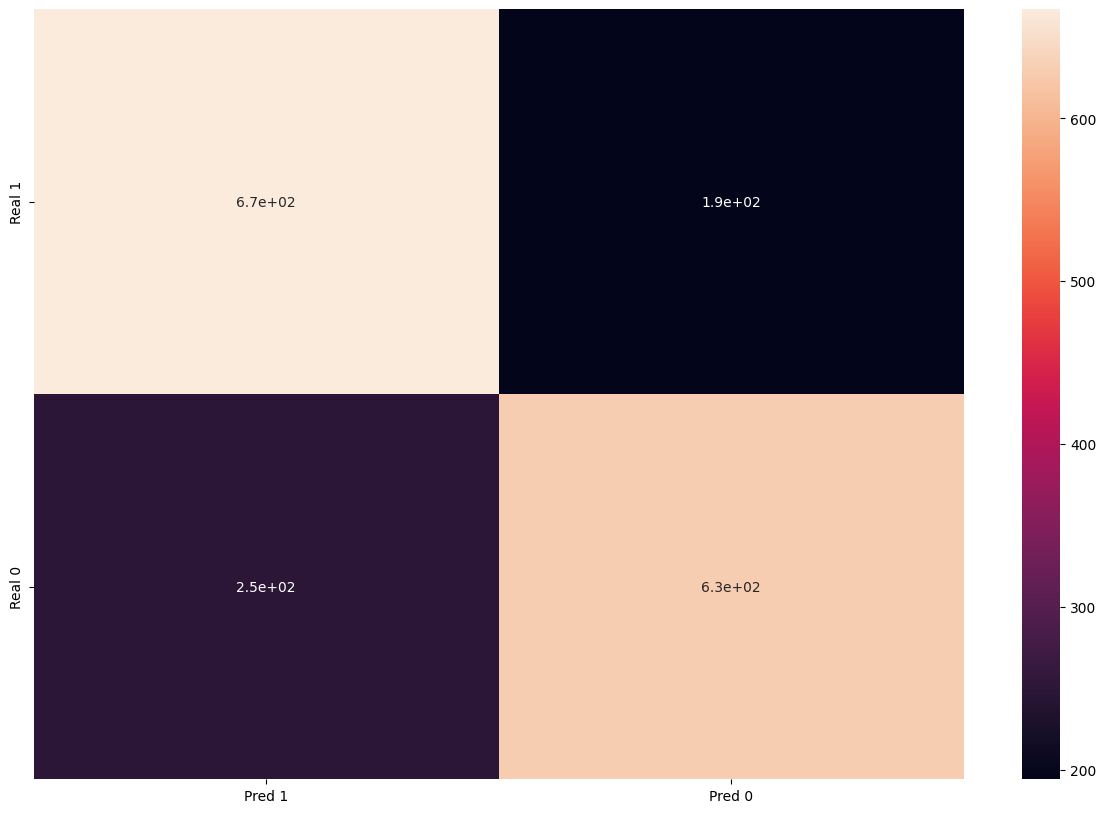

In [51]:
cf_val = pd.DataFrame(confusion_matrix(Y_val, model2.predict(X_red_val)), index = ['Real 1', 'Real 0'], columns= ['Pred 1', 'Pred 0'])
plt.figure(figsize=(15,10))
sns.heatmap(cf_val, annot=True)

# Submission

In [52]:
submission = model2.predict(X_test_red)
submission = pd.DataFrame(submission, columns=['Transported'])
submission['PassengerID'] = PId
submission = submission[['PassengerID', 'Transported']]
submission['Transported'] = submission['Transported'].apply(bool)
submission.to_csv('/kaggle/working/submission.csv', index=False)